In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

#df=pd.read_csv("mental_health.csv")
df17=pd.read_csv("OSMI 2017.csv")
df18=pd.read_csv("OSMI 2018.csv")
df19=pd.read_csv("OSMI 2019.csv")
df20=pd.read_csv("OSMI 2020.csv")
df21=pd.read_csv("OSMI 2021.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Indepedent variables that can be used: Age, gender, family history and benefits offered by employer


In [ ]:
for col in df.columns:
    print(col)

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

In [ ]:

renamed_columns=["Self_employed","Total_employees","Tech_organization","IT_Tech","Mental_health_coverage","Awareness_of_options_under_coverage","Employers_discussion_on_mental_health","Resources_and_options_for_help","Anomity_of_employees_using_mental_health_resources","Mental_issue_related_leave","Discussing_mental_health_neg_consequences","Discussing_physical_health_neg_consequences","Comfort_discussing_with_coworkers","Comfort_discussing_with_supervisor","Employer_seriousness_on_mental_health","Negative_consequences_of_coworkers_with_mental_health_disorder","Medical_coverage","Aware_of_local_online_resources","Reveal_condition_to_clients_business_contacts","Consequence_if_revealed_health_issue_to_client_or_business_contact",'Diagnosed_but_not_revealed_with_coworkers_employees','negimpact_reveal_coworker','prod_affect_mental_issue','percent_worktime_affected','have_prev_empl','prev_empl_mental_benefits','aware_benefits_prev_empl','formal_discuss_mental_health_premp','premp_provide_resources_learn_seekhelp','anonymity_protect_premp_choose_resources','neg_eff_discuss_mental_health_premp','neg_eff_discuss_phy_health_premp','willing_discuss_issue_prev_coworkers','willing_discuss_issue_dir_supervisors','premp_took_menhealth_seriously_as_phyhealth','neg_comments_abt_coworkers_with_menissues_prev_workplace','bring_phyhealth_issue_with_potential_empl_interview','phy_y_ynot','bring_menhealth_issue_with_potential_empl_interview','men_y_ynot','hurt_carrer_if_identified_as_person_with_mental_issue','more_neg_view_from_coworker_if_know_abt_men_issue','share_w_friends_fam','workplace_response','other_exp_in_workplace','fam_hist','past_mh','curr_mh','diagnosed','maybe_diagnosed','diagnosed_prof','diagnosed_prof_mh','treatment_mh_prof','work_interference_treatment','work_interference_no_treatment','age','gender','country_live','us_state_live','country_work','us_state_work','work_pos','remote']
df.columns=renamed_columns

In [ ]:

to_drop_columns=[i for i in df.columns if df[i].isna().sum()>df.shape[0]/2]
print(to_drop_columns)
df.drop(to_drop_columns,axis=1,inplace=True)

['IT_Tech', 'Medical_coverage', 'Aware_of_local_online_resources', 'Reveal_condition_to_clients_business_contacts', 'Consequence_if_revealed_health_issue_to_client_or_business_contact', 'Diagnosed_but_not_revealed_with_coworkers_employees', 'negimpact_reveal_coworker', 'prod_affect_mental_issue', 'percent_worktime_affected', 'other_exp_in_workplace', 'diagnosed', 'maybe_diagnosed', 'diagnosed_prof_mh']


In [ ]:
#gender has 70 different classes. Encoding them to fewer classes for ease of calculation:
#male:1, female:2, anything else:3
df['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman','NaN'], value = 3, inplace = True)
#Change all non-responses to 3
df['gender'].replace(to_replace=[np.NaN], value=3,inplace=True)

In [ ]:
#columns 'phy_y_ynot' and 'men_y_ynot' mainly contain comments which aren't of much use for our problem definition
# hence, we drop the columns 'phy_y_ynot' and 'men_y_ynot'
df.drop(labels ='phy_y_ynot', axis = 1, inplace = True)
df.drop(labels ='men_y_ynot', axis = 1, inplace = True)

# dealing with missing values in 'prev_empl_mental_benefits'
# from previous operation, we see that, whenever the value for have_prev_empl = 0, then the value for 'prev_empl_mental_benefits' = Nan
# hence replacing the nans with "Not Applicable"
df['prev_empl_mental_benefits'].fillna('Not Applicable',inplace= True)
df['prev_empl_mental_benefits'].unique()

# the same observation was found for the missing values in columns from formal_discuss_mental_health_premp' to'neg_comments_abt_coworkers_with_menissues_prev_workplace'
# replacing missing values 
# whenever the value for have_prev_empl = 0, then the value in the other col= Nan
# hence replacing the nans with "Not Applicable"
df['aware_benefits_prev_empl'].fillna('Not Applicable',inplace= True)
df['formal_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['premp_provide_resources_learn_seekhelp'].fillna('Not Applicable',inplace= True)
df['anonymity_protect_premp_choose_resources'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_phy_health_premp'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_dir_supervisors'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_prev_coworkers'].fillna('Not Applicable',inplace= True) 
df['premp_took_menhealth_seriously_as_phyhealth'].fillna('Not Applicable',inplace= True)
df['neg_comments_abt_coworkers_with_menissues_prev_workplace'].fillna('Not Applicable',inplace= True)

#Acronyms of countries with long names (United states of america)
df['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

#Removing age outliers (323,3,etc). Replace such ages with the mean of all ages
mean_age = df[(df['age'] >= 18) | (df['age'] <= 80)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)
#df=df.dropna()

In [ ]:
df.isnull().sum().sum()

5415

In [ ]:

#Remaining columns with null values
for i in df.columns:
    if(df[i].isnull().values.any()):
        print(i)

Total_employees
Tech_organization
Mental_health_coverage
Awareness_of_options_under_coverage
Employers_discussion_on_mental_health
Resources_and_options_for_help
Anomity_of_employees_using_mental_health_resources
Mental_issue_related_leave
Discussing_mental_health_neg_consequences
Discussing_physical_health_neg_consequences
Comfort_discussing_with_coworkers
Comfort_discussing_with_supervisor
Employer_seriousness_on_mental_health
Negative_consequences_of_coworkers_with_mental_health_disorder
workplace_response
us_state_live
us_state_work


In [ ]:
#It is seen that the people who are self employed have missing values in the corresponding rows of the column Total_employees 
# hence the missing values were imputed with '1-5' as most of the self employed people had a total of 1-5 employees
df['Total_employees']=df['Total_employees'].replace(to_replace=np.nan,value='1-5')
#Missing values in Tech_organization column is replaced by the mode of the same column
df['Tech_organization']=df['Tech_organization'].replace(to_replace=np.nan,value=1)
#Grouping the remaining columns with respect to 'Self_employed' column 
#and imputing the missing values in each column with the modes of that column corresponding to each group.
for column in df.columns:
    if column!='Self_employed':
        df[column]= df.groupby(['Self_employed'], sort=False)[column].apply(lambda x: x.fillna(x.mode()))

In [ ]:
print(df.shape[0])
df['country_live'].unique()

1433


array(['UK', 'USA', 'Canada', 'Germany', 'Netherlands', 'Czech Republic',
       'Lithuania', 'Australia', 'France', 'Venezuela', 'Poland',
       'Belgium', 'Brazil', 'Denmark', 'Sweden', 'Russia', 'Spain',
       'India', 'Mexico', 'Switzerland', 'Norway', 'Argentina', 'Ireland',
       'Italy', 'Finland', 'Colombia', 'Costa Rica', 'Vietnam',
       'Bulgaria', 'New Zealand', 'South Africa', 'Slovakia', 'Austria',
       'Bangladesh', 'Algeria', 'Pakistan', 'Afghanistan', 'Greece',
       'Romania', 'Other', 'Brunei', 'Japan', 'Iran', 'Hungary', 'Israel',
       'Ecuador', 'Bosnia and Herzegovina', 'China', 'Chile', 'Guatemala',
       'Taiwan', 'Serbia', 'Estonia'], dtype=object)

In [ ]:

df_no_drp = df
df_no_drp

,Self_employed,Total_employees,Tech_organization,Mental_health_coverage,Awareness_of_options_under_coverage,Employers_discussion_on_mental_health,Resources_and_options_for_help,Anomity_of_employees_using_mental_health_resources,Mental_issue_related_leave,Discussing_mental_health_neg_consequences,...,work_interference_treatment,work_interference_no_treatment,age,gender,country_live,us_state_live,country_work,us_state_work,work_pos,remote
0,0,26-100,1.0,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39.0,1.0,UK,California,UK,California,Back-end Developer,Sometimes
1,0,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29.0,1.0,USA,Illinois,USA,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38.0,1.0,UK,NaN,UK,NaN,Back-end Developer,Always
3,1,1-5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43.0,1.0,UK,NaN,UK,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43.0,2.0,USA,Illinois,USA,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,1-5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34.0,2.0,USA,New York,USA,New York,Other,Sometimes
1429,1,1-5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56.0,1.0,USA,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,...,Rarely,Sometimes,52.0,1.0,USA,Georgia,USA,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,Maybe,...,Sometimes,Often,30.0,2.0,USA,Nebraska,USA,Nebraska,DevOps/SysAdmin,Sometimes


In [ ]:
#Dropping remainig rows which still contained missing values
df=df.dropna()

In [ ]:
df.isnull().sum().sum()

0

In [ ]:


#Encoding
No_of_pos=[]
for i in df['work_pos']:
    No_of_pos.append(i.count('|')+1)
df['No_of_pos']=No_of_pos
df.drop(labels ='work_pos', axis = 1, inplace = True)

In [ ]:
encode={
    'Total_employees' : [['26-100', '6-25', '0','More than 1000' ,'100-500', '500-1000', '1-5'],[3,2,0,6,4,5,1]],
    'Mental_health_coverage' : [['Not eligible for coverage / N/A' ,'No', 'Yes', "I don't know"],[0,2,3,1]],
    'Awareness_of_options_under_coverage' : [['Yes', 'No', 'I am not sure'],[2,1,0]],
    'Employers_discussion_on_mental_health' : [['Yes' ,'No',"I don't know"],[2,1,0]],
    'Resources_and_options_for_help' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Anomity_of_employees_using_mental_health_resources' : [['Yes', 'No', "I don't know"],[2,1,0]],
    'Mental_issue_related_leave' : [['Somewhat easy' ,'Neither easy nor difficult', 'Very easy', 'Very difficult', 'Somewhat difficult', "I don't know"],[4,2,5,0,1,3]],
    'Discussing_mental_health_neg_consequences' : [['No', 'Yes', 'Maybe'],[2,0,1]],
    'Discussing_physical_health_neg_consequences' : [['No', 'Maybe','Yes'],[2,1,0]],
    'Comfort_discussing_with_coworkers' : [['Maybe', 'Yes', 'No'],[1,2,0]],
    'Comfort_discussing_with_supervisor' : [['Yes', 'No', 'Maybe'],[2,0,1]],
    'Employer_seriousness_on_mental_health' : [['Yes', 'No', "I don't know"],[2,0,1]],
    'Negative_consequences_of_coworkers_with_mental_health_disorder' : [['No','Yes'],[1,0]],
    'prev_empl_mental_benefits' : [['Yes, they all did', "I don't know", 'Some did', 'No, none did', 'Not Applicable'],[4,2,3,0,1]],
    'aware_benefits_prev_empl' : [['I was aware of some', 'N/A (not currently aware)', 'Yes, I was aware of all of them', 'No, I only became aware later', 'Not Applicable'],[3,2,4,0,1]],
    'formal_discuss_mental_health_premp' : [['None did', 'Some did', 'Not Applicable', "I don't know", 'Yes, they all did'],[0,3,1,2,4]],
    'premp_provide_resources_learn_seekhelp' : [['Some did', 'None did', 'Not Applicable', 'Yes, they all did'],[2,0,1,3]],
    'anonymity_protect_premp_choose_resources' : [['Yes, always', "I don't know", 'Sometimes', 'No', 'Not Applicable'],[4,2,3,0,1]],
    'neg_eff_discuss_mental_health_premp' : [['None of them', 'Some of them','Yes, all of them', "I don't know", 'Not Applicable'],[4,1,0,2,3]],
    'neg_eff_discuss_phy_health_premp' : [['None of them', 'Some of them', 'Yes, all of them', 'Not Applicable'],[3,1,0,2]],
    'willing_discuss_issue_prev_coworkers'  : [['No, at none of my previous employers', 'Some of my previous employers', 'Yes, at all of my previous employers', 'Not Applicable'],[0,1,3,2]],
    'willing_discuss_issue_dir_supervisors' : [['Some of my previous employers','Yes, at all of my previous employers', 'No, at none of my previous employers', "I don't know", 'Not Applicable'],[3,4,0,1,2]],
    'premp_took_menhealth_seriously_as_phyhealth' :[["I don't know",'Some did','None did','Yes, they all did','Not Applicable'],[0,2,1,3,0]],
    'neg_comments_abt_coworkers_with_menissues_prev_workplace':[['None of them','Some of them','Not Applicable','Yes, all of them'],[1,2,0,3]],
    'bring_phyhealth_issue_with_potential_empl_interview'   :   [['Maybe','Yes','No'],[1,2,0]],
    'bring_menhealth_issue_with_potential_empl_interview'   :   [['Maybe', 'No', 'Yes'],[1,0,2]],
    'hurt_carrer_if_identified_as_person_with_mental_issue'   :   [['Maybe', "No, I don't think it would", 'Yes, I think it would',
    'No, it has not', 'Yes, it has'],[1,0,2,0,2]],
    'more_neg_view_from_coworker_if_know_abt_men_issue'   :   [["No, I don't think they would", 'Maybe', 'Yes, they do',
    'Yes, I think they would', 'No, they do not'],[0,1,2,2,0]],
    'share_w_friends_fam'   :   [['Somewhat open', 'Neutral', 'Not applicable to me (I do not have a mental illness)', 'Very open',
    'Not open at all', 'Somewhat not open'],[4,3,0,5,1,2]],
    'workplace_response'   :   [['No', 'Maybe/Not sure', 'Yes, I experienced', 'Yes, I observed', np.nan],[0,1,2,2,1]],
    'fam_hist'   :   [['No', 'Yes', "I don't know"],[0,2,1]],
    'past_mh'   :   [['Yes', 'Maybe', 'No'],[2,1,0]],
    'curr_mh'   :   [['No', 'Yes', 'Maybe'],[0,2,1]],
    'diagnosed_prof'   :   [['Yes', 'No'],[1,0]],
    'work_interference_treatment'   :   [['Not applicable to me', 'Rarely', 'Sometimes', 'Never', 'Often'],[0,2,3,1,4]],
    'work_interference_no_treatment'   :   [['Not applicable to me', 'Sometimes', 'Often', 'Rarely', 'Never'],[0,3,4,2,1]],
    'remote'   :   [['Sometimes','Never','Always'],[1,0,2]]
}


In [ ]:
indexNames = df[~(df['Self_employed'] == 0)].index
fill=['0',0,'Not eligible for coverage / N/A','No','No','No',"I don't know","Somewhat easy","No","No","Maybe","Yes","I don't know","No"]
for i in indexNames:
    df.iloc[i,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]]=fill

In [ ]:
for i in encode.keys():
    df[i]=df[i].replace(to_replace=encode[i][0],value=encode[i][1])

In [ ]:
#Dividing the stated of the USA into 4 divisions
north_east=['Pennsylvania','New York','Rhode Island','Maine','New Jersey','New Hampshire','Massachusetts','Vermont','Connecticut']
south=['Delaware','District of Columbia','Texas','Louisiana','Oklahoma','Alabama','Kentucky','Virginia','South Carolina','Maryland','West Virginia','North Carolina','Georgia','Florida','Tennessee']
mid_west=['Illinois','Indiana','Minnesota','Iowa','Ohio','Michigan','Wisconsin','Missouri','Nebraska','North Dakota','South Dakota','Kansas']
west=['California','Montana','Oregon','New Mexico','Alaska','Washington','Nevada','Arizona','Utah','Colorado','Hawaii','Idaho']

In [ ]:
#Encoding columns - us_state_live and us_state_work
# north_east=1, mid_west=2, west=3, south=4
df['us_state_live'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_live'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_live'].replace(to_replace = west,value =3, inplace = True)
df['us_state_live'].replace(to_replace = south, value =4, inplace = True)

In [ ]:
df['us_state_work'].replace(to_replace = north_east, value =1, inplace = True)
df['us_state_work'].replace(to_replace = mid_west, value =2, inplace = True)
df['us_state_work'].replace(to_replace = west,value =3, inplace = True)
df['us_state_work'].replace(to_replace = south, value =4, inplace = True)

In [ ]:
#Encoding country_live and country_work
# USA=0 UK=1
df['country_live'].replace(to_replace = 'USA', value =0, inplace = True)
df['country_live'].replace(to_replace = 'UK', value =1, inplace = True)
df['country_work'].replace(to_replace = 'USA',value =0, inplace = True)
df['country_work'].replace(to_replace = 'UK', value =1, inplace = True)

In [ ]:
#Unique values in each column
for i in df.columns:
    print(i," : ",df[i].unique())
print(len(df.columns))

Self_employed  :  [0]
Total_employees  :  [3 2 6 4 5 1]
Tech_organization  :  [1. 0.]
Mental_health_coverage  :  [0 2 3 1]
Awareness_of_options_under_coverage  :  [1 2 0]
Employers_discussion_on_mental_health  :  [1 2 0]
Resources_and_options_for_help  :  [1 2 0]
Anomity_of_employees_using_mental_health_resources  :  [0 2 1]
Mental_issue_related_leave  :  [5 4 2 0 1 3]
Discussing_mental_health_neg_consequences  :  [2 0 1]
Discussing_physical_health_neg_consequences  :  [2 1 0]
Comfort_discussing_with_coworkers  :  [1 2 0]
Comfort_discussing_with_supervisor  :  [2 0 1]
Employer_seriousness_on_mental_health  :  [1 2 0]
Negative_consequences_of_coworkers_with_mental_health_disorder  :  [1 0]
have_prev_empl  :  [1 0]
prev_empl_mental_benefits  :  [0 4 2 3 1]
aware_benefits_prev_empl  :  [2 3 4 0 1]
formal_discuss_mental_health_premp  :  [2 0 3 1 4]
premp_provide_resources_learn_seekhelp  :  [0 2 1 3]
anonymity_protect_premp_choose_resources  :  [2 4 3 0 1]
neg_eff_discuss_mental_health_pre

In [ ]:
df.to_csv('prepro_clean_mental_health.csv')

In [ ]:
#MODELS

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = df.drop('diagnosed_prof', axis = 1)
Y = df['diagnosed_prof']

In [ ]:
X.shape

(657, 47)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify = Y,test_size = 0.3,random_state = 2222)

In [ ]:
Y_test

7       1
264     0
578     0
846     1
121     0
       ..
1241    0
316     0
188     1
667     1
666     1
Name: diagnosed_prof, Length: 198, dtype: int64

In [ ]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

KNN

In [ ]:
K = [] 
training = [] 
test = [] 
scores = {}
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
for k in range(2, 25): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train, Y_train) 
  
    training_score = clf.score(X_train, Y_train) 
    test_score = clf.score(X_test, Y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [ ]:
for keys, values in scores.items(): 
    print(keys, ':', values)

2 : [0.8976034858387799, 0.8080808080808081]
3 : [0.9193899782135077, 0.8888888888888888]
4 : [0.9172113289760349, 0.8838383838383839]
5 : [0.8997821350762527, 0.8838383838383839]
6 : [0.8888888888888888, 0.8888888888888888]
7 : [0.8867102396514162, 0.8838383838383839]
8 : [0.8888888888888888, 0.898989898989899]
9 : [0.8736383442265795, 0.8888888888888888]
10 : [0.8736383442265795, 0.8939393939393939]
11 : [0.8736383442265795, 0.8838383838383839]
12 : [0.8801742919389978, 0.8939393939393939]
13 : [0.8758169934640523, 0.8787878787878788]
14 : [0.8714596949891068, 0.8838383838383839]
15 : [0.8779956427015251, 0.8686868686868687]
16 : [0.8714596949891068, 0.8838383838383839]
17 : [0.869281045751634, 0.8939393939393939]
18 : [0.8714596949891068, 0.8939393939393939]
19 : [0.8714596949891068, 0.8939393939393939]
20 : [0.8714596949891068, 0.898989898989899]
21 : [0.869281045751634, 0.898989898989899]
22 : [0.8758169934640523, 0.8939393939393939]
23 : [0.869281045751634, 0.8838383838383839]
24

Mean Absolute Error: 0.10101010101010101
Mean Squared Error: 0.10101010101010101
Root Mean Squared Error: 0.3178208630818641
accuracy =  89.8989898989899
p =  0.924812030075188
r =  0.8823529411764706
f1 =  0.8926829268292682
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        85
           1       0.85      1.00      0.92       113

    accuracy                           0.90       198
   macro avg       0.92      0.88      0.89       198
weighted avg       0.91      0.90      0.90       198



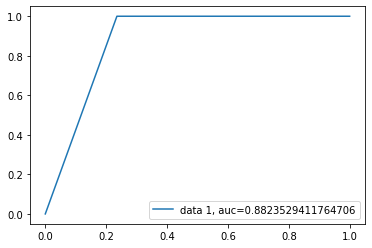

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_knn)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_knn=accuracy_score(Y_test, Y_pred_knn)
f1_knn=f1_score(Y_test, Y_pred_knn, average="macro")
p_knn=precision_score(Y_test, Y_pred_knn, average="macro")
r_knn=recall_score(Y_test, Y_pred_knn, average="macro")
print("accuracy = ",100*accuracy_knn)
print("p = ",p_knn)
print("r = ",r_knn)
print("f1 = ",f1_knn)
print(classification_report(Y_test, Y_pred_knn))
# Plot ROC curve
fpr_knn, tpr_knn, _ = metrics.roc_curve(Y_test,  Y_pred_knn)
auc_knn = metrics.roc_auc_score(Y_test,  Y_pred_knn)
plt.plot(fpr_knn,tpr_knn,label="data 1, auc="+str(auc_knn))
plt.legend(loc=4)
plt.show()

Logistic Regression

Mean Absolute Error: 0.08585858585858586
Mean Squared Error: 0.08585858585858586
Root Mean Squared Error: 0.2930163576638442
accuracy =  91.41414141414141
p =  0.9265873015873016
r =  0.902915148360229
f1 =  0.9102950190549797
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        85
           1       0.88      0.98      0.93       113

    accuracy                           0.91       198
   macro avg       0.93      0.90      0.91       198
weighted avg       0.92      0.91      0.91       198



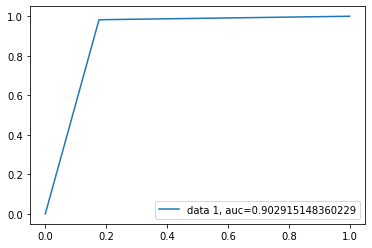

In [ ]:
logreg.fit(X_train,Y_train)
Y_pred_lg = logreg.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_lg = confusion_matrix(Y_test, Y_pred_lg)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_lg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_lg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lg)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_lg=accuracy_score(Y_test, Y_pred_lg)
f1_lg=f1_score(Y_test, Y_pred_lg, average="macro")
p_lg=precision_score(Y_test, Y_pred_lg, average="macro")
r_lg=recall_score(Y_test, Y_pred_lg, average="macro")
print("accuracy = ",100*accuracy_lg)
print("p = ",p_lg)
print("r = ",r_lg)
print("f1 = ",f1_lg)
print(classification_report(Y_test, Y_pred_lg))
# Plot ROC curve
fpr_lg, tpr_lg, _ = metrics.roc_curve(Y_test,  Y_pred_lg)
auc_lg = metrics.roc_auc_score(Y_test,  Y_pred_lg)
plt.plot(fpr_lg,tpr_lg,label="data 1, auc="+str(auc_lg))
plt.legend(loc=4)
plt.show()

Decision trees

Mean Absolute Error: 0.14646464646464646
Mean Squared Error: 0.14646464646464646
Root Mean Squared Error: 0.38270699819136633
accuracy =  85.35353535353535
p =  0.8611111111111112
r =  0.8410723581467985
f1 =  0.8469738560349651
              precision    recall  f1-score   support

           0       0.89      0.75      0.82        85
           1       0.83      0.93      0.88       113

    accuracy                           0.85       198
   macro avg       0.86      0.84      0.85       198
weighted avg       0.86      0.85      0.85       198



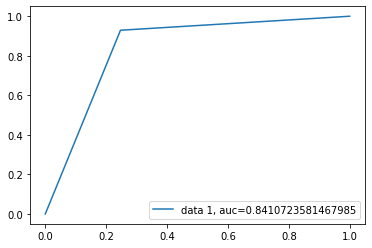

In [ ]:
tree.fit(X_train,Y_train)
Y_pred_tree = tree.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_tree = confusion_matrix(Y_test, Y_pred_tree)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_tree))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_tree)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_tree=accuracy_score(Y_test, Y_pred_tree)
f1_tree=f1_score(Y_test, Y_pred_tree, average="macro")
p_tree=precision_score(Y_test, Y_pred_tree, average="macro")
r_tree=recall_score(Y_test, Y_pred_tree, average="macro")
print("accuracy = ",100*accuracy_tree)
print("p = ",p_tree)
print("r = ",r_tree)
print("f1 = ",f1_tree)
print(classification_report(Y_test, Y_pred_tree))
# Plot ROC curve
fpr_tree, tpr_tree, _ = metrics.roc_curve(Y_test,  Y_pred_tree)
auc_tree = metrics.roc_auc_score(Y_test,  Y_pred_tree)
plt.plot(fpr_tree,tpr_tree,label="data 1, auc="+str(auc_tree))
plt.legend(loc=4)
plt.show()

RANDOM FOREST

In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=2222)

In [ ]:
Y_pred = rf.predict(X_test)

In [ ]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [ ]:
cm

array([[ 68,  17],
       [  0, 113]])

In [ ]:
#evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.08585858585858586
Mean Squared Error: 0.08585858585858586
Root Mean Squared Error: 0.2930163576638442


In [ ]:
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy=accuracy_score(Y_test, Y_pred)
f1=f1_score(Y_test, Y_pred, average="macro")
p=precision_score(Y_test, Y_pred, average="macro")
r=recall_score(Y_test, Y_pred, average="macro")
print("accuracy = ",100*accuracy)
print("p = ",p)
print("r = ",r)
print("f1 = ",f1)
print(classification_report(Y_test, Y_pred))

accuracy =  91.41414141414141
p =  0.9346153846153846
r =  0.9
f1 =  0.9094650205761317
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        85
           1       0.87      1.00      0.93       113

    accuracy                           0.91       198
   macro avg       0.93      0.90      0.91       198
weighted avg       0.93      0.91      0.91       198



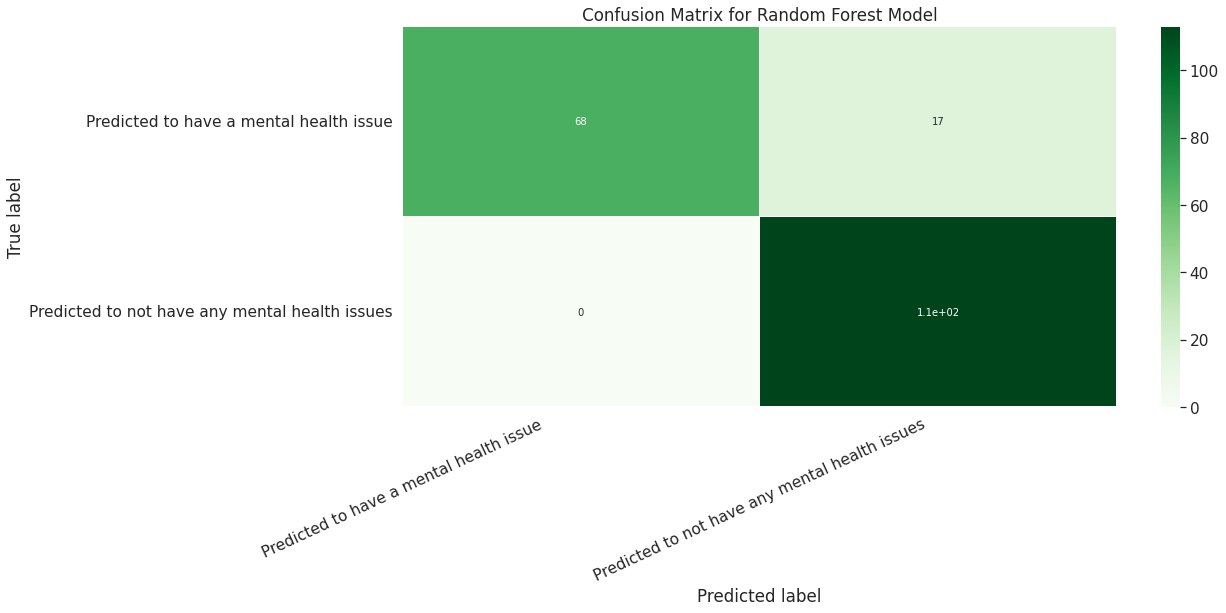

In [ ]:
# Build the plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Predicted to have a mental health issue', 'Predicted to not have any mental health issues']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

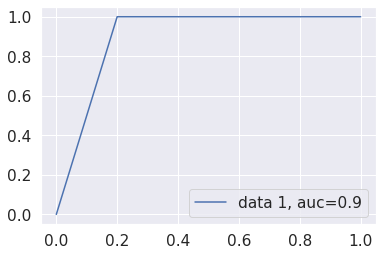

In [ ]:
# Plot ROC curve
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred)
auc = metrics.roc_auc_score(Y_test,  Y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


ADABOOST

In [ ]:
ada.fit(X_train,Y_train)
Y_pred_ada = ada.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(Y_test, Y_pred_ada)
cm_ada

array([[ 74,  11],
       [ 12, 101]])

In [ ]:
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_ada))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_ada))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ada)))

Mean Absolute Error: 0.11616161616161616
Mean Squared Error: 0.11616161616161616
Root Mean Squared Error: 0.3408249054303634


In [ ]:
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_ada=accuracy_score(Y_test, Y_pred_ada)
f1_ada=f1_score(Y_test, Y_pred_ada, average="macro")
p_ada=precision_score(Y_test, Y_pred_ada, average="macro")
r_ada=recall_score(Y_test, Y_pred_ada, average="macro")
print("accuracy = ",100*accuracy_ada)
print("p = ",p_ada)
print("r = ",r_ada)
print("f1 = ",f1_ada)
print(classification_report(Y_test, Y_pred_ada))

accuracy =  88.38383838383838
p =  0.881125415282392
r =  0.8821967725143154
f1 =  0.8816374269005848
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        85
           1       0.90      0.89      0.90       113

    accuracy                           0.88       198
   macro avg       0.88      0.88      0.88       198
weighted avg       0.88      0.88      0.88       198



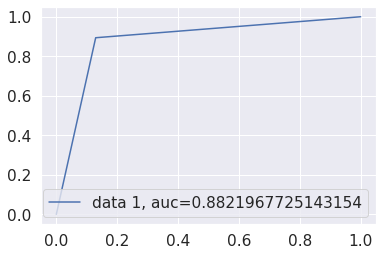

In [ ]:
# Plot ROC curve
fpr_ada, tpr_ada, _ = metrics.roc_curve(Y_test,  Y_pred_ada)
auc_ada = metrics.roc_auc_score(Y_test,  Y_pred_ada)
plt.plot(fpr_ada,tpr_ada,label="data 1, auc="+str(auc_ada))
plt.legend(loc=4)
plt.show()


XGBOOST

Mean Absolute Error: 0.06565656565656566
Mean Squared Error: 0.06565656565656566
Root Mean Squared Error: 0.25623537159526916
accuracy =  93.43434343434343
p =  0.9448561464690497
r =  0.9249869859448203
f1 =  0.9316933365177932
              precision    recall  f1-score   support

           0       0.99      0.86      0.92        85
           1       0.90      0.99      0.95       113

    accuracy                           0.93       198
   macro avg       0.94      0.92      0.93       198
weighted avg       0.94      0.93      0.93       198



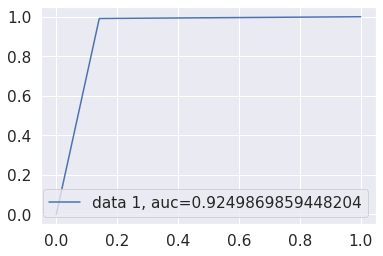

In [ ]:
xgboost.fit(X_train,Y_train)
Y_pred_xg = xgboost.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_xg = confusion_matrix(Y_test, Y_pred_xg)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_xg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_xg)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_xg=accuracy_score(Y_test, Y_pred_xg)
f1_xg=f1_score(Y_test, Y_pred_xg, average="macro")
p_xg=precision_score(Y_test, Y_pred_xg, average="macro")
r_xg=recall_score(Y_test, Y_pred_xg, average="macro")
print("accuracy = ",100*accuracy_xg)
print("p = ",p_xg)
print("r = ",r_xg)
print("f1 = ",f1_xg)
print(classification_report(Y_test, Y_pred_xg))
# Plot ROC curve
fpr_xg, tpr_xg, _ = metrics.roc_curve(Y_test,  Y_pred_xg)
auc_xg = metrics.roc_auc_score(Y_test,  Y_pred_xg)
plt.plot(fpr_xg,tpr_xg,label="data 1, auc="+str(auc_xg))
plt.legend(loc=4)
plt.show()

GRADIENT BOOSTING CLASSIFIER

Mean Absolute Error: 0.06060606060606061
Mean Squared Error: 0.06060606060606061
Root Mean Squared Error: 0.24618298195866548
accuracy =  93.93939393939394
p =  0.9486178861788618
r =  0.9308693388859969
f1 =  0.9370762711864407
              precision    recall  f1-score   support

           0       0.99      0.87      0.93        85
           1       0.91      0.99      0.95       113

    accuracy                           0.94       198
   macro avg       0.95      0.93      0.94       198
weighted avg       0.94      0.94      0.94       198



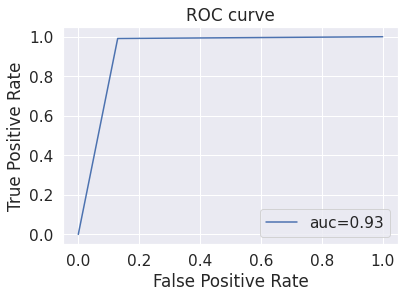

In [ ]:
grad.fit(X_train,Y_train)
Y_pred_grad = grad.predict(X_test)
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_grad = confusion_matrix(Y_test, Y_pred_grad)
#evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_grad))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_grad))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_grad)))
#precision, recall, f1 score, accuracy 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
accuracy_grad=accuracy_score(Y_test, Y_pred_grad)
f1_grad=f1_score(Y_test, Y_pred_grad, average="macro")
p_grad=precision_score(Y_test, Y_pred_grad, average="macro")
r_grad=recall_score(Y_test, Y_pred_grad, average="macro")
print("accuracy = ",100*accuracy_grad)
print("p = ",p_grad)
print("r = ",r_grad)
print("f1 = ",f1_grad)
print(classification_report(Y_test, Y_pred_grad))
# Plot ROC curve
fpr_grad, tpr_grad, _ = metrics.roc_curve(Y_test,  Y_pred_grad)
auc_grad = metrics.roc_auc_score(Y_test,  Y_pred_grad)
plt.plot(fpr_grad,tpr_grad,label="auc="+str(round(auc_grad,2)))
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('grad_boost_roc.png')
plt.show()


K FOLD CROSS VALIDATION

In [ ]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)

logreg_score = cross_val_score(logreg, X_train, Y_train, cv = kf)
print("Cross Validation Scores are {}".format(logreg_score))
print("Average Cross Validation score :{}+/- {}".format(logreg_score.mean()*100,logreg_score.std()*100))

Cross Validation Scores are [0.81818182 0.84848485 0.84848485 0.87878788 0.84848485 0.81818182
 0.90909091 0.93939394 0.81818182 0.90909091 0.81818182 0.9375
 0.875      0.90625   ]
Average Cross Validation score :86.9521103896104+/- 4.30699155912631


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
rf_score=cross_val_score(rf,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(rf_score))
print("Average Cross Validation score :{}".format(rf_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(rf_score.mean()*100,rf_score.std()*100))

Cross Validation Scores are [0.81818182 0.87878788 0.84848485 0.93939394 0.90909091 0.87878788
 0.90909091 0.93939394 0.87878788 0.87878788 0.87878788 0.90625
 0.84375    0.9375    ]
Average Cross Validation score :0.8889339826839827
Average Cross Validation score :88.89339826839827+/- 3.561884630767643


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
tree_score=cross_val_score(tree,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(tree_score))
print("Average Cross Validation score :{}".format(tree_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(tree_score.mean()*100,tree_score.std()*100))

Cross Validation Scores are [0.75757576 0.87878788 0.78787879 0.87878788 0.84848485 0.84848485
 0.84848485 0.78787879 0.90909091 0.84848485 0.87878788 0.8125
 0.8125     0.96875   ]
Average Cross Validation score :0.8476055194805194
Average Cross Validation score :84.76055194805194+/- 5.283482869827194


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
knn_score=cross_val_score(knn,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(knn_score))
print("Average Cross Validation score :{}+/- {}".format(knn_score.mean()*100,knn_score.std()*100))

Cross Validation Scores are [0.87878788 0.87878788 0.78787879 0.87878788 0.84848485 0.72727273
 0.93939394 0.90909091 0.87878788 0.84848485 0.81818182 0.78125
 0.875      0.90625   ]
Average Cross Validation score :85.40313852813853+/- 5.5435994228149434


In [ ]:

kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
ada_score=cross_val_score(ada,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(ada_score))
print("Average Cross Validation score :{}+/- {}".format(ada_score.mean()*100,ada_score.std()*100))

Cross Validation Scores are [0.84848485 0.87878788 0.75757576 0.84848485 0.81818182 0.78787879
 0.90909091 0.93939394 0.84848485 0.84848485 0.84848485 0.90625
 0.90625    0.90625   ]
Average Cross Validation score :86.08630952380952+/- 4.897302928757536


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
grad_score=cross_val_score(grad,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(grad_score))
print("Average Cross Validation score :{}+/- {}".format(grad_score.mean()*100,grad_score.std()*100))

Cross Validation Scores are [0.90909091 0.87878788 0.84848485 0.93939394 0.87878788 0.81818182
 0.90909091 0.90909091 0.87878788 0.87878788 0.87878788 0.90625
 0.875      0.9375    ]
Average Cross Validation score :88.90016233766235+/- 3.1366980991876807


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
xgboost_score=cross_val_score(xgboost,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(xgboost_score))
print("Average Cross Validation score :{}+/- {}".format(xgboost_score.mean()*100,xgboost_score.std()*100))

Cross Validation Scores are [0.84848485 0.87878788 0.84848485 0.90909091 0.87878788 0.78787879
 0.93939394 0.90909091 0.87878788 0.87878788 0.84848485 0.9375
 0.84375    0.9375    ]
Average Cross Validation score :88.03436147186147+/- 4.1932701630312925


**CLUSTERING**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

KMEANS CLUSTERING

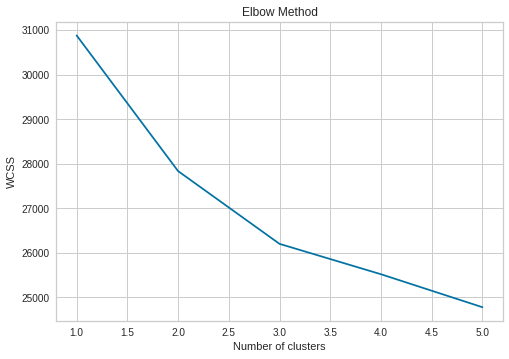

In [ ]:
#KMeans
wcss = []
scaler=StandardScaler()
X=scaler.fit_transform(df)
#kmeans_model = KMeans(max_iter=600,n_clusters=3, random_state=42)
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=600, n_init=1, random_state=0)
    kmeans.fit(X)
    #kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

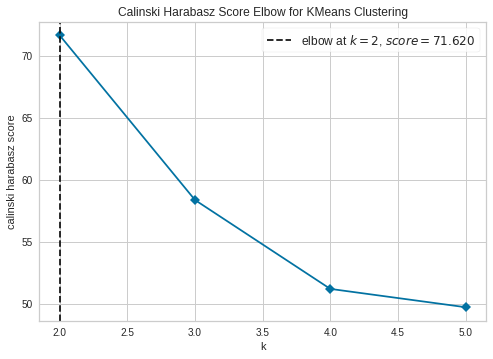

In [ ]:
model = KMeans()
#X = scaler.fit_transform(X)
visualizer = KElbowVisualizer(model, k=(2,6), metric='calinski_harabasz', timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

K Means Evaluation

Sum of sqaured errors SSE:  42406.22745239889
Silhouette score: 0.33409330026232703
calinski_harabasz_score: 424.529
1.1387430743901628


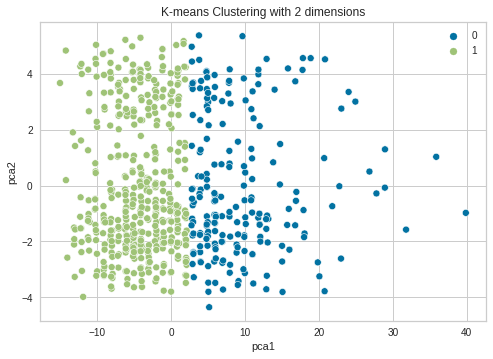

In [ ]:
# K-Means evaluation
kmeans2 = KMeans(n_clusters=2, random_state=1).fit(df)
# we store the cluster labels
kmeans_labels2 = kmeans2.labels_
sse= kmeans2.inertia_
score1 = silhouette_score(df, kmeans_labels2, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmeans_labels2)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmeans_labels2))
from sklearn.decomposition import PCA



Run PCA on the data and reduce the dimensions in pca_num_components dimensions

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=kmeans_labels2, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(df)
kmeans_labels3 = kmeans3.labels_
sse= kmeans3.inertia_
score1 = silhouette_score(df, kmeans_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmeans_labels3)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmeans_labels3))

: 

Running PCA on the data and reduce the dimensions in pca_num_components dimensions

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=kmeans_labels3, data=results)
plt.title('K-means Clustering')
plt.savefig('kmeans.png')
plt.show()

GAUSSIAN MIXTURE MODELS

In [ ]:

gmm_model2 = GaussianMixture(n_components=2)
gmm_model3 = GaussianMixture(n_components=3)
gmm_model2.fit(df)
gmm_model3.fit(df)
# we store the cluster labels
gmm_labels2 = gmm_model2.predict(df)
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, gmm_labels2, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, gmm_labels2)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, gmm_labels2))
sns.scatterplot(x="pca1", y="pca2", hue=gmm_labels2, data=results)
plt.title('GMM with 2 dimensions')
plt.show()


: 

In [ ]:
# we store the cluster labels
gmm_labels3=gmm_model3.predict(df)
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, gmm_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, gmm_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, gmm_labels3))
sns.scatterplot(x="pca1", y="pca2", hue=gmm_labels3, data=results)
plt.title('Gaussian Mixture Models')
plt.savefig('gmm.png')
plt.show()


: 

SPECTRAL CLUSTERING

In [ ]:
from sklearn.cluster import SpectralClustering
spectral_cluster_model3= SpectralClustering(
    n_clusters=3, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)
spectral_cluster_model2= SpectralClustering(
    n_clusters=2, 
    random_state=25, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)
spectral_cluster_model2.fit(df)
spectral_cluster_model3.fit(df)
sc_labels2=spectral_cluster_model2.labels_

score1 = silhouette_score(df, sc_labels2, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, sc_labels2)

print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, sc_labels2))
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=sc_labels2, data=results)
plt.title('Spectral Clustering in 2 dimensions')
plt.show()

: 

In [ ]:
sc_labels3=spectral_cluster_model3.labels_
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, sc_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, sc_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, sc_labels3))
sns.scatterplot(x="pca1", y="pca2", hue=sc_labels3, data=results)
plt.title('Spectral Clustering')
plt.savefig('spc.png')
plt.show()


: 

In [ ]:
# from yellowbrick.cluster import silhouette_visualizer

# # Use the quick method and immediately show the figure
# silhouette_visualizer(spectral_cluster_model3, df, colors='yellowbrick')

: 

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

Data_DBSCAN = df
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()
##
db_model = DBSCAN(eps=0.025, min_samples=3).fit(Data_DBSCAN)
#, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2).fit(df)
core_samples_mask = np.zeros_like(db_model.labels_, dtype=bool)
core_samples_mask[db_model.core_sample_indices_] = True
db_labels = db_model.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print(db_labels) 

: 

In [ ]:
#n_clusters_

: 

BIRCH

In [ ]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import Birch


# define the model
birch_model = Birch(threshold=0.03, n_clusters=3)

# train the model
birch_model.fit(df)
birch_labels3=birch_model.labels_
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, birch_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, birch_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, birch_labels3))
sns.scatterplot(x="pca1", y="pca2", hue=birch_labels3, data=results)
plt.title('BIRCH clustering')
plt.savefig('birch.png')
plt.show()

# # assign each data point to a cluster
# birch_result = birch_model.predict(df)

# # get all of the unique clusters
# birch_clusters = unique(birch_result)

# # plot the BIRCH clusters
# for birch_cluster in birch_clusters:
#     # get data points that fall in this cluster
#     index = where(birch_result == birch_clusters)
#     # make the plot
#     pyplot.scatter(training_data[index, 0], training_data[index, 1])

# # show the BIRCH plot
# pyplot.show()


: 

: 

K-MEDOIDS/ PAM

In [ ]:
!pip install scikit-learn-extra

: 

In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids_euc_3 = KMedoids(n_clusters=3, metric='euclidean', method='pam', init='k-medoids++', max_iter=300, random_state=None)
kmedoids_euc_3.fit(df)
kmedoids_euc_labels3 = kmedoids_euc_3.labels_

#sse= gmm_model2.inertia_
score1 = silhouette_score(df, kmedoids_euc_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmedoids_euc_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, kmedoids_euc_labels3))


: 

In [ ]:
kmedoids_euc_2 = KMedoids(n_clusters=2, metric='euclidean', method='pam', init='heuristic', max_iter=1000, random_state=None)
kmedoids_euc_2.fit(df)
kmedoids_euc_labels2 = kmedoids_euc_2.labels_

#sse= gmm_model2.inertia_
score1 = silhouette_score(df, kmedoids_euc_labels2, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmedoids_euc_labels2)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, kmedoids_euc_labels2))

: 

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue=kmedoids_euc_labels2, data=results)
plt.title('PAM with 2 dimensions')
plt.show()

: 

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue=kmedoids_euc_labels3, data=results)
plt.title('PAM clustering')
plt.savefig('pam.png')
plt.show()


: 

CLARA

In [ ]:
!pip install pyclustering

: 

In [ ]:
# from pyclustering.cluster.clarans import clarans
# from pyclustering.utils import timedcall
# clarans_model2 = clarans(X, 3, 6, 4)
# #clarans_model2.process()
# (tks, res) = timedcall(clarans_model2.process);
# #Print the execution time
# print("Execution time : ", tks, "\n");
# #returns the clusters 
# clst = clarans_model2.get_clusters(); 
# med = clarans_obj.get_medoids();
# print("Index of clusters' points :\n",clst)
# print("\nLabel class of each point :\n ",bc_dataset.target)
# print("\nIndex of the best medoids : ",med)
# #clarans_clusters = clarans_model2.get_clusters();
# #clarans_labels2 = clarans_model2.labels_
# #clarans_clusters

: 

KMEANS++

In [ ]:
km_plus2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000).fit(df)
# we store the cluster labels
kmplus_labels2 = km_plus2.labels_
sse= km_plus2.inertia_
score1 = silhouette_score(df, kmplus_labels2, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmplus_labels2)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmplus_labels2))
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

sns.scatterplot(x="pca1", y="pca2", hue=kmplus_labels2, data=results)
plt.title('K-means++ Clustering with 2 dimensions')
plt.show()

: 

In [ ]:
km_plus3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000).fit(df)
# we store the cluster labels
kmplus_labels3 = km_plus3.labels_
sse= km_plus3.inertia_
score1 = silhouette_score(df, kmplus_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmplus_labels3)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmplus_labels3))
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

sns.scatterplot(x="pca1", y="pca2", hue=kmplus_labels3, data=results)
plt.title('K-means++ Clustering')
plt.savefig('kmeans++.png')
plt.show()


: 

KMODES

In [ ]:
!pip install kmodes

: 

In [ ]:
from kmodes.kmodes import KModes
kmodes_model2 = KModes(n_clusters=2).fit(df)
# we store the cluster labels
kmodes_labels2 = kmodes_model2.labels_
#sse= kmodes_model2.inertia_
score1 = silhouette_score(df, kmodes_labels2, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmodes_labels2)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmodes_labels2))
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

sns.scatterplot(x="pca1", y="pca2", hue=kmodes_labels2, data=results)
plt.title('Kmodes Clustering with 2 dimensions')
plt.show()

: 

In [ ]:
from kmodes.kmodes import KModes
kmodes_model3 = KModes(n_clusters=3).fit(df)
# we store the cluster labels
kmodes_labels3 = kmodes_model3.labels_
#sse= kmodes_model2.inertia_
score1 = silhouette_score(df, kmodes_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmodes_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmodes_labels3))
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

sns.scatterplot(x="pca1", y="pca2", hue=kmodes_labels3, data=results)
plt.title('Kmodes Clustering')
plt.savefig('kmodes.png')
plt.show()


: 

: 

K PROTOTYPE 

In [ ]:
# from kmodes.kprototypes import KPrototypes
# kproto3 = KPrototypes(n_clusters=3, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=.25) 
# kproto3.fit_predict(df)
# # we store the cluster labels
# kproto_labels3 = kproto3.labels_
# #sse= kmodes_model2.inertia_
# score1 = silhouette_score(df, kproto_labels3, metric='euclidean')
# score3=metrics.calinski_harabasz_score(df, kproto_labels3)
# #print("Sum of sqaured errors SSE: ",sse)
# print("Silhouette score:",score1)
# print('calinski_harabasz_score: %.3f' % score3)
# print(davies_bouldin_score(df, kproto_labels3))
# from sklearn.decomposition import PCA
# ### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

# sns.scatterplot(x="pca1", y="pca2", hue=kproto_labels3, data=results)
# plt.title('Kmodes Clustering with 2 dimensions')
# plt.show()

: 

AFFINITY PROPAGATION

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.cluster import AffinityPropagation

# # define the model
# aff_prop_model = AffinityPropagation(damping=0.9)

# # train the model
# aff_prop_model.fit(df)

# aff_prop_lables=aff_prop_model.labels_
# #sse= gmm_model2.inertia_
# score1 = silhouette_score(df, aff_prop_lables, metric='euclidean')
# score3=metrics.calinski_harabasz_score(df, aff_prop_lables)
# #print("Sum of sqaured errors SSE: ",sse)
# print("Silhouette score:",score1)
# print('calinski_harabasz_score: %.3f' % score3)
# print('davies_bouldin_score :',davies_bouldin_score(df, aff_prop_lables))
# sns.scatterplot(x="pca1", y="pca2", hue=aff_prop_lables, data=results)
# plt.title('AFFNINITY PROPAGATION with 2 dimensions')
# plt.show()

: 

AGGLOMORATIVE HEIRARCHY CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define the model
agglomerative_model = AgglomerativeClustering(n_clusters=3)

# assign each data point to a cluster
agglomerative_model.fit(df)

agg_lables=agglomerative_model.labels_
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, agg_lables, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, agg_lables)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, agg_lables))
sns.scatterplot(x="pca1", y="pca2", hue=agg_lables, data=results)
plt.title('AGGLOMORATIVE HEIRARCHY CLUSTERING')
plt.savefig('agg.png')
plt.show()


: 

RISK SCORE CALCULATION

In [ ]:
#Calculating risk scores for each cluster using the classifications for curr_mh and diagnosed_prof
#we make 3 different clusters
#sc_labels3
#kmplus_labels3
cluster1 = [x[0] for x, value in np.ndenumerate(sc_labels3) if value==0]
cluster2=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==1]
cluster3=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==2]
cluster1_risk=0
total_high=0
for i in range(len(cluster1)) :
    diagnosed=df.iloc[cluster1[i], 36]
    curr_mh=df.iloc[cluster1[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster1_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster1_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster1_risk+=0.25
cluster2_risk=0
for i in range(len(cluster2)) : 
    diagnosed=df.iloc[cluster2[i], 36]
    curr_mh=df.iloc[cluster2[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster2_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster2_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster2_risk+=0.25
cluster3_risk=0
for i in range(len(cluster3)) : 
    diagnosed=df.iloc[cluster3[i], 36]
    curr_mh=df.iloc[cluster3[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster3_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster3_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster3_risk+=0.25
#The risks for each cluster are used to identify which cluster is high, low, med
print('cluster1:',cluster1_risk)
print('cluster2:',cluster2_risk)
print('cluster3:',cluster3_risk)
print(cluster1)
print(cluster2)
print(cluster3)

: 

In [ ]:
#Calculating risk scores for each cluster using the classifications for curr_mh and diagnosed_prof
#we make 3 different clusters
#sc_labels3
#kmplus_labels3
cluster1 = [x[0] for x, value in np.ndenumerate(sc_labels3) if value==0]
cluster2=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==1]
cluster3=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==2]
cluster1_risk=0
total_high=0
for i in range(len(cluster1)) :
    diagnosed=df.iloc[cluster1[i], 36]
    curr_mh=df.iloc[cluster1[i], 35]
    if(diagnosed==1):
        cluster1_risk+=1
    # if(curr_mh==2 and diagnosed==0):
    #     cluster1_risk+=2
    # if(curr_mh==1 and diagnosed==1):
    #     cluster1_risk+=2
    # if(curr_mh==1 and diagnosed==0):
    #     cluster1_risk+=0.5
    # if(curr_mh==0 and diagnosed==1):
    #     cluster1_risk+=0.25
cluster2_risk=0
for i in range(len(cluster2)) : 
    diagnosed=df.iloc[cluster2[i], 36]
    curr_mh=df.iloc[cluster2[i], 35]
    if(diagnosed==1):
        cluster2_risk+=1
    # if(curr_mh==2 and diagnosed==0):
    #     cluster2_risk+=2
    # if(curr_mh==1 and diagnosed==1):
    #     cluster2_risk+=2
    # if(curr_mh==1 and diagnosed==0):
    #     cluster2_risk+=0.5
    # if(curr_mh==0 and diagnosed==1):
    #     cluster2_risk+=0.25
cluster3_risk=0
for i in range(len(cluster3)) : 
    diagnosed=df.iloc[cluster3[i], 36]
    curr_mh=df.iloc[cluster3[i], 35]
    if(diagnosed==1):
        cluster3_risk+=1
    # if(curr_mh==2 and diagnosed==0):
    #     cluster3_risk+=2
    # if(curr_mh==1 and diagnosed==1):
    #     cluster3_risk+=2
    # if(curr_mh==1 and diagnosed==0):
    #     cluster3_risk+=0.5
    # if(curr_mh==0 and diagnosed==1):
    #     cluster3_risk+=0.25
#The risks for each cluster are used to identify which cluster is high, low, med
print('cluster1:',cluster1_risk)
print('cluster2:',cluster2_risk)
print('cluster3:',cluster3_risk)
print(cluster1)
print(cluster2)
print(cluster3)

: 

In [ ]:
# cluster1: 123
# cluster2: 143
# cluster3: 18

: 

In [ ]:
#Classifying clusters as high, row and medium risks using cluster risks
import sys
cluster_risks=[[cluster1,cluster1_risk],[cluster2,cluster2_risk],[cluster3,cluster3_risk]]
high_risk=0
total=3
low_risk = sys.maxsize
high_risk_index=0
low_risk_index=0
high_risk_class=cluster_risks[0][0]
low_risk_class=cluster_risks[0][0]
for i in range(0,len(cluster_risks)):
    if(high_risk<=cluster_risks[i][1]):
        high_risk_class=cluster_risks[i][0]
        high_risk_index=i
        high_risk=cluster_risks[i][1]
total-=high_risk_index
print(total)
for i in range(0,len(cluster_risks)):
    if(low_risk>=cluster_risks[i][1]):
        low_risk_class=cluster_risks[i][0]
        low_risk_index = i
        low_risk=cluster_risks[i][1]
total = total - low_risk_index
med_risk_class=cluster_risks[total][0]
print(high_risk_class)
print(med_risk_class)
print(low_risk_class) 

: 

In [ ]:
print(high_risk_index)
#print(med_risk_index)
print(low_risk_index)

: 

In [ ]:
tot_high_risk=len(high_risk_class)
tot_med_risk=len(med_risk_class)
tot_low_risk=len(low_risk_class)

: 

In [ ]:
df.columns[33]

: 

INFERENCES

supportiveness statistics for osmi 2016

In [ ]:
#mental helath benefits as part of health coverage
mh_cov_yes=df_no_drp[df_no_drp['Mental_health_coverage']=='Yes']['Mental_health_coverage'].count()
mh_cov_no=df_no_drp[df_no_drp['Mental_health_coverage']=='No']['Mental_health_coverage'].count()
print(mh_cov_yes/len(df_no_drp['Mental_health_coverage'])*100, mh_cov_no/len(df_no_drp['Mental_health_coverage'])*100)

: 

In [ ]:
#formal discussion
form_dis_yes=df_no_drp[df_no_drp['Employers_discussion_on_mental_health']=='Yes']['Employers_discussion_on_mental_health'].count()
form_dis_no=df_no_drp[df_no_drp['Employers_discussion_on_mental_health']=='No']['Employers_discussion_on_mental_health'].count()
print(form_dis_yes/len(df_no_drp['Employers_discussion_on_mental_health'])*100, form_dis_no/len(df_no_drp['Employers_discussion_on_mental_health'])*100)

: 

In [ ]:
#employer offer resources to learn more about mental health concerns and options for seeking help
res_help_yes=df_no_drp[df_no_drp['Resources_and_options_for_help']=='Yes']['Resources_and_options_for_help'].count()
res_help_no=df_no_drp[df_no_drp['Resources_and_options_for_help']=='No']['Resources_and_options_for_help'].count()
print(res_help_yes/len(df_no_drp['Resources_and_options_for_help'])*100, res_help_no/len(df_no_drp['Resources_and_options_for_help'])*100)

: 

In [ ]:
df[df.columns[6]].unique()
df.columns[5]

: 

In [ ]:
from collections import Counter
a=[]
for i in range(len(high_risk_class)) :
        a.append(df.iloc[high_risk_class[i],5])
b=[]
for i in range(len(med_risk_class)) :
        b.append(df.iloc[med_risk_class[i],5])
c=[]
for i in range(len(low_risk_class)) :
        c.append(df.iloc[low_risk_class[i],5])

print("a",Counter(a)[0])
print(Counter(a)[1])
print(Counter(a)[2])
print("b",Counter(b)[0])
print(Counter(b)[1])
print(Counter(b)[2])
print("c",Counter(c)[0])
print(Counter(c)[1])
print(Counter(c)[2])

: 

In [ ]:
from collections import Counter
a=[]
for i in range(len(high_risk_class)) :
        a.append(df.iloc[high_risk_class[i],6])
b=[]
for i in range(len(med_risk_class)) :
        b.append(df.iloc[med_risk_class[i],6])
c=[]
for i in range(len(low_risk_class)) :
        c.append(df.iloc[low_risk_class[i],6])

print("a",Counter(a)[0])
print(Counter(a)[1])
print(Counter(a)[2])
print("b",Counter(b)[0])
print(Counter(b)[1])
print(Counter(b)[2])
print("c",Counter(c)[0])
print(Counter(c)[1])
print(Counter(c)[2])

: 

In [ ]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,8))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =-0)
#fig.suptitle('Social support towards mental health by employers', fontsize = 18, y=1.08)

#For Eurpoe
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [126, 98, 14]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax1.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Risk levels of employees whose employers\ndon\'t offer resources to learn about mental health\nconcerns and options for seeking help', pad =3, fontsize =16)


#For America
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [94, 82, 15]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax2.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Risk levels of employees who observed\nor experienced unsupportiveness or\n badly handled response to mental health issues in workplace', pad =3, fontsize =16)

#For Asia Africa and Australia
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [228, 210, 25]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax3.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Risk levels of employees whose employers\ndo not formally discuss mental health', pad =3, fontsize =16)

#ax3.legend(labels=labels, loc=(-2.4,0.5),prop={'size': 11})
plt.savefig('social_supp_by_emp.png')

: 

: 

FAMILIY HISTORY OF MENTAL ILLNESS

In [ ]:
#Inferences
#Effect of family history (col no=33)
fam_hist_high=0;
no_fam_hist_high=0;
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],33]==2):
            fam_hist_high+=1
        if(df.iloc[high_risk_class[i],33]==0):
            no_fam_hist_high+=1

fam_hist_med=0;
no_fam_hist_med=0
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],33]==2):
            fam_hist_med+=1
        if(df.iloc[med_risk_class[i],33]==0):
            no_fam_hist_med+=1
            
fam_hist_low=0;
no_fam_hist_low=0
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],33]==2):
            fam_hist_low+=1
        if(df.iloc[low_risk_class[i],33]==0):
            no_fam_hist_low+=1
print(fam_hist_high)
print(fam_hist_med)
print(fam_hist_low)
print(no_fam_hist_high)
print(no_fam_hist_med)
print(no_fam_hist_low)

: 

In [ ]:
#plotting Effect of family history (col no=33) on risk level
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,3))
#fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[fam_hist_high, fam_hist_med, fam_hist_low]
ax.bar(risks,level)
plt.xlabel('Risk levels')
plt.ylabel('Number of employees with\nfamily history of mental illness')
#plt.title('Instances of FAMILY HISTORY OF MENTAL ILLNESS of people at different risk levels')
plt.savefig("family_hist_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

: 

In [ ]:
import plotly.graph_objects as go
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[fam_hist_high, fam_hist_med, fam_hist_low]
fig = go.Figure(data=[go.Bar(name='Family history', x=risks, y=level,text=[str(x) for x in level])])
# Change the bar mode

fig.update_layout(xaxis_title='Risk-levels', yaxis_title='Number of employees with<br>family history of mental illness')
fig.show()

: 

WILLINGNESS TO SHARE MENTAL ILLNESS WITH FRIENDS & FAMILY

In [ ]:
#Risk levels for people who dont open up about their illness: (col=31)
# share_w_friends_fam = 2 ==> somewhat not open
# share_w_friends_fam = 1 ==> not open at all
share_high=0;
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        if(df.iloc[high_risk_class[i],31]==2 or df.iloc[high_risk_class[i],31]==1):
            share_high+=1
        
#For medium risk
share_med=0;
for i in range(len(med_risk_class)) :

        # if(df.iloc[med_risk_class[i],31]==1):
        #     share_med+=3
        if(df.iloc[med_risk_class[i],31]==2 or df.iloc[med_risk_class[i],31]==1):
            share_med+=1
#For low risk
share_low=0;
for i in range(len(low_risk_class)) :

        # if(df.iloc[low_risk_class[i],31]==1):
        #     share_low+=3
        if(df.iloc[low_risk_class[i],31]==2 or df.iloc[low_risk_class[i],31]==1):
            share_low+=1
            

print(share_high)
print(share_med)
print(share_low)

: 

In [ ]:
not_share_high=share_high
not_share_med=share_med
not_share_low=share_low

: 

In [ ]:
# #Risk levels for people who dont open up about their illness: (col=31)
# # share_w_friends_fam = 2 ==> somewhat not open
# # share_w_friends_fam = 1 ==> not open at all
# share_high=0;
# for i in range(len(high_risk_class)) :

#         if(df.iloc[high_risk_class[i],31]==5): 
#             share_high+=3
#         if(df.iloc[high_risk_class[i],31]==4):
#             share_high+=1
        
# #For medium risk
# share_med=0;
# for i in range(len(med_risk_class)) :

#         if(df.iloc[med_risk_class[i],31]==1):
#             share_med+=3
#         if(df.iloc[med_risk_class[i],31]==2):
#             share_med+=1
# #For low risk
# share_low=0;
# for i in range(len(low_risk_class)) :

#         if(df.iloc[low_risk_class[i],31]==1):
#             share_low+=3
#         if(df.iloc[low_risk_class[i],31]==2):
#             share_low+=1
            

# print(share_high)
# print(share_med)
# print(share_low)

: 

In [ ]:
print(len(high_risk_class))
print(len(med_risk_class))
print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[high_risk_class[i],31])
from collections import Counter
print(Counter(l)[5])
print(Counter(l)[4])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
#Risk levels for people who dont open up about their illness: (col=31)
# share_w_friends_fam = 2 ==> somewhat not open
# share_w_friends_fam = 1 ==> not open at all
share_high=0;
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        if(df.iloc[high_risk_class[i],31]==5 or df.iloc[high_risk_class[i],31]==4):
            share_high+=1
        
#For medium risk
share_med=0;
for i in range(len(med_risk_class)) :

        # if(df.iloc[med_risk_class[i],31]==1):
        #     share_med+=3
        if(df.iloc[med_risk_class[i],31]==5 or df.iloc[med_risk_class[i],31]==4):
            share_med+=1
#For low risk
share_low=0;
for i in range(len(low_risk_class)) :

        # if(df.iloc[low_risk_class[i],31]==1):
        #     share_low+=3
        if(df.iloc[low_risk_class[i],31]==5 or df.iloc[low_risk_class[i],31]==4):
            share_low+=1
            

print(share_high)
print(share_med)
print(share_low)

: 

Unsupportiveness or badly handled response to a mental health issue

In [ ]:
l=[]
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df_no_drp.iloc[high_risk_class[i],32])
from collections import Counter
print(Counter(l)['Yes, I observed'])
print(Counter(l)['Yes, I experienced'])
print(Counter(l)['No'])
print(Counter(l)['Maybe/Not sure'])

: 

In [ ]:
l=[]
for i in range(len(med_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df_no_drp.iloc[med_risk_class[i],32])
from collections import Counter
print(Counter(l)['Yes, I observed'])
print(Counter(l)['Yes, I experienced'])
print(Counter(l)['No'])
print(Counter(l)['Maybe/Not sure'])

: 

In [ ]:
l=[]
for i in range(len(low_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df_no_drp.iloc[low_risk_class[i],32])
from collections import Counter
print(Counter(l)['Yes, I observed'])
print(Counter(l)['Yes, I experienced'])
print(Counter(l)['No'])
print(Counter(l)['Maybe/Not sure'])

: 

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [94, 82, 15]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
#plt.title("Risk levels of people who don't share their mental illness with friends and family")
#plt.savefig("dont_share_issue_frnds_fam_risk.jpg",bbox_inches='tight', dpi=150)
plt.savefig('unsupp_risk.jpg')
plt.show()

: 

Fear of negative consequences on discussing mental health disorder with employer vs risk-levels

In [ ]:
print(df.columns[9])
df['Discussing_mental_health_neg_consequences'].unique()


: 

In [ ]:
print(len(high_risk_class))
print(len(med_risk_class))
print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[high_risk_class[i],31])
from collections import Counter
print(Counter(l)[0])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
l=[]
for i in range(len(med_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[med_risk_class[i],31])
from collections import Counter
print(Counter(l)[0])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
l=[]
for i in range(len(low_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[low_risk_class[i],31])
from collections import Counter
print(Counter(l)[0])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [share_high, share_med, share_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
#plt.title("Risk levels of people who don't share their mental illness with friends and family")
plt.savefig("dont_share_issue_frnds_fam_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

: 

Past mental health condition vs risk levels

In [ ]:
print(len(high_risk_class))
print(len(med_risk_class))
print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[high_risk_class[i],34])
from collections import Counter
past_mh_high=Counter(l)[2]
print(Counter(l)[0])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
l=[]
for i in range(len(low_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[low_risk_class[i],31])
from collections import Counter
past_mh_low=Counter(l)[2]
print(Counter(l)[0])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
l=[]
for i in range(len(med_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[med_risk_class[i],31])
        
from collections import Counter
past_mh_med=Counter(l)[2]
print(Counter(l)[0])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
import plotly.graph_objects as go
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[past_mh_high, past_mh_med, past_mh_low]
fig = go.Figure(data=[go.Bar(name='Discussion with employer', x=risks, y=level,text=[str(x) for x in level])])
# Change the bar mode

fig.update_layout(xaxis_title='Risk-levels', yaxis_title='Number of employees with a<br>mental health disorder in the past')
fig.show()

: 

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [past_mh_high, past_mh_med, past_mh_low]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
#plt.title("Risk levels of people who don't share their mental illness with friends and family")
plt.savefig("past_mh_disorder_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

: 

gender vs risk levels

In [ ]:
print(len(high_risk_class))
print(len(med_risk_class))
print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[high_risk_class[i],41])
from collections import Counter
fem_high=Counter(l)[2]
print(Counter(l)[3])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
l=[]
for i in range(len(med_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[med_risk_class[i],31])
        
from collections import Counter
fem_med=Counter(l)[2]
print(Counter(l)[3])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
l=[]
for i in range(len(low_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[low_risk_class[i],31])
from collections import Counter
fem_low=Counter(l)[2]
print(Counter(l)[3])
print(Counter(l)[1])
print(Counter(l)[2])

: 

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [fem_high, fem_med, fem_low]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
#plt.title("Risk levels of people who don't share their mental illness with friends and family")
plt.savefig("female_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

: 

age vs risk

In [ ]:
# print(len(high_risk_class))
# print(len(med_risk_class))
# print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[high_risk_class[i],40])
from collections import Counter
print(min(l),max(l))
avg_age_high=sum(l)/len(l)
l=[]
for i in range(len(med_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[med_risk_class[i],40])
print(min(l),max(l))
avg_age_med=sum(l)/len(l)
l=[]
for i in range(len(low_risk_class)) :

        # if(df.iloc[high_risk_class[i],31]==1): 
        #     share_high+=3
        l.append(df.iloc[low_risk_class[i],40])
print(min(l),max(l))
avg_age_low=sum(l)/len(l)
print(avg_age_high)
print(avg_age_med)
print(avg_age_low)


: 

In [ ]:
tot_age_18_25=0
tot_age_26_45=0
tot_age_46_65=0
tot_age_66_75=0

age_18_25_high=0
age_18_25_med=0
age_18_25_low=0

age_26_45_high=0
age_26_45_med=0
age_26_45_low=0

age_46_65_high=0
age_46_65_med=0
age_46_65_low=0

age_66_75_high=0
age_66_75_med=0
age_66_75_low=0
for i in range(len(high_risk_class)) :
        if(df.iloc[high_risk_class[i],40]>=18 and df.iloc[high_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_high+=1
        elif(df.iloc[high_risk_class[i],40]>=26 and df.iloc[high_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_high+=1
        elif(df.iloc[high_risk_class[i],40]>=46 and df.iloc[high_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_high+=1
        elif(df.iloc[high_risk_class[i],40]>=66 and df.iloc[high_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_high+=1
for i in range(len(med_risk_class)) :
        if(df.iloc[med_risk_class[i],40]>=18 and df.iloc[med_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_med+=1
        elif(df.iloc[med_risk_class[i],40]>=26 and df.iloc[med_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_med+=1
        elif(df.iloc[med_risk_class[i],40]>=46 and df.iloc[med_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_med+=1
        elif(df.iloc[med_risk_class[i],40]>=66 and df.iloc[med_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_med+=1
for i in range(len(low_risk_class)) :
        if(df.iloc[low_risk_class[i],40]>=18 and df.iloc[low_risk_class[i],40]<=25): 
            tot_age_18_25+=1
            age_18_25_low+=1
        elif(df.iloc[low_risk_class[i],40]>=26 and df.iloc[low_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_low+=1
        elif(df.iloc[low_risk_class[i],40]>=46 and df.iloc[low_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_low+=1
        elif(df.iloc[low_risk_class[i],40]>=66 and df.iloc[low_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_low+=1


: 

In [ ]:
age_high = [age_18_25_high/tot_age_18_25,age_26_45_high/tot_age_26_45, age_46_65_high/tot_age_46_65, age_66_75_high/tot_age_66_75 ]
age_med = [age_18_25_med/tot_age_18_25, age_26_45_med/tot_age_26_45, age_46_65_med/tot_age_46_65, age_66_75_med/tot_age_66_75 ]
age_low = [age_18_25_low/tot_age_18_25, age_26_45_low/tot_age_26_45, age_46_65_low/tot_age_46_65, age_66_75_low/tot_age_66_75 ]

: 

In [ ]:
# print(age_18_25)
# print(age_26_45)
# print(age_46_65)
# print(age_66_75)

: 

In [ ]:
y1=[round(i*100,2) for i in age_high]
y2=[round(i*100,2) for i in age_med]
y3=[round(i*100,2) for i in age_low]
# y4=[round(i*100,2) for i in age_66_75]

: 

In [ ]:
import plotly.graph_objects as go
x =['18-25', '26-45', '46-65', '66-75']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y1, name='High-Risk',text=[str(x)+"%" for x in y1], marker_color='red'))
fig.add_trace(go.Bar(x=x, y=y2,name='Medium-Risk',text=[str(x)+"%"  for x in y2], marker_color='yellow'))
fig.add_trace(go.Bar(x=x, y=y3,name='Low-Risk',text=[str(x)+"%"  for x in y3], marker_color='green'))
fig.update_layout(barmode='stack',  xaxis_title='Age of Employees', yaxis_title='Fraction of employees<br>in different risk levels')
#fig.savefig('rating_tech_supp.jpg')
fig.show()

: 

EFFECT OF REMOTE WORK ON RISK LEVELS

In [ ]:
#If working remote affects their mental health col==46
# remote = 2 ==> always
# remote = 1 ==> sometimes
# remote = 0 ==> never
remote_high=0;
not_remote_high=0
sometime_high=0
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],46]==2): 
            remote_high+=1
        if(df.iloc[high_risk_class[i],46]==1): 
            remote_high+=1
        if(df.iloc[high_risk_class[i],46]==0): 
            not_remote_high+=1
        # if(df.iloc[high_risk_class[i],46]==1): 
        #     not_remote_high+=1
        
        #if(df.iloc[high_risk_class[i],46]==1):
         #   remote_high+=0.5
        
#For medium risk
remote_med=0;
not_remote_med=0;
sometime_med=0
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],46]==2):
            remote_med+=1
        if(df.iloc[med_risk_class[i],46]==1):
            remote_med+=1
        if(df.iloc[med_risk_class[i],46]==0): 
            not_remote_med+=1
        # if(df.iloc[med_risk_class[i],46]==1): 
        #     not_remote_med+=1
        #if(df.iloc[med_risk_class[i],46]==1):
         #   remote_med+=0.5
#For low risk
remote_low=0;
not_remote_low=0;
sometime_low=0
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],46]==2):
            remote_low+=1
        if(df.iloc[low_risk_class[i],46]==1):
            remote_low+=1
        if(df.iloc[low_risk_class[i],46]==0): 
            not_remote_low+=1
        # if(df.iloc[low_risk_class[i],46]==1):
        #     not_remote_low+=1
        #if(df.iloc[low_risk_class[i],46]==1):
         #   remote_low+=0.5
            
print("REMOTE")
print(remote_high)
print(remote_med)
print(remote_low)
print("NOT REMOTE")
print(not_remote_high)
print(not_remote_med)
print(not_remote_low)
# print("Sometime")
# print(sometime_high)
# print(sometime_med)
# print(sometime_low)

: 

In [ ]:
import plotly.graph_objects as go
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[remote_high, remote_med, remote_low]
fig = go.Figure(data=[go.Bar(name='Discussion with employer', x=risks, y=level,text=[str(x) for x in level])])
# Change the bar mode

fig.update_layout(xaxis_title='Risk-levels', yaxis_title='Number of employees working remotely')
fig.show()

: 

In [ ]:
high_risk_work_pat=[remote_high/tot_high_risk,not_remote_high/tot_high_risk,sometime_high/tot_high_risk]
print(high_risk_work_pat)
med_risk_work_pat=[remote_med/tot_med_risk,not_remote_med/tot_med_risk,sometime_med/tot_med_risk]
print(med_risk_work_pat)
low_risk_work_pat=[remote_low/tot_low_risk,not_remote_low/tot_low_risk,sometime_low/tot_low_risk]
print(low_risk_work_pat)

: 

In [ ]:
high_risk_work_pat=[remote_high/tot_high_risk,not_remote_high/tot_high_risk]
print(high_risk_work_pat)
med_risk_work_pat=[remote_med/tot_med_risk,not_remote_med/tot_med_risk]
print(med_risk_work_pat)
low_risk_work_pat=[remote_low/tot_low_risk,not_remote_low/tot_low_risk]
print(low_risk_work_pat)

: 

In [ ]:
#Risk levels for remote and non-remote workers
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [remote_high, remote_med, remote_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
#plt.title('Risk levels for Remote workers')
plt.savefig("remote_risk.png")
plt.show()

sizes = [not_remote_high, not_remote_med, not_remote_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
#plt.title('Risk levels for Non-Remote workers')
plt.savefig("non_remote_risk.png")
plt.show()

: 

EFFECT OF NEGATIVE REACTION TO MENTAL ILLNESS (IN WORKPLACE) ON RISK LEVELS

In [ ]:
# Seeing as non-remote workers run such a high risk, we decided to examine the attitudes of their work culture
# taking into consideration:  
# 1) negative consequences for co-workers who have been open about mental health issues in workplace 
# 2) unsupportive or badly handled response to a mental health issue in their current or previous workplace
# 3) negative consequences for co-workers with mental health issues in previous workplaces
# 4) fear of negative consequences on discussing a mental health disorder with employer
#col_nos= 14, 30, 32
response_risk_high=0
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],14]==0): 
            response_risk_high+=5
        # if(df.iloc[high_risk_class[i],21]==0):
        #     response_risk_high+=1
        if(df.iloc[high_risk_class[i],9]==0):
            response_risk_high+=2
        if(df.iloc[high_risk_class[i],32]==2):
            response_risk_high+=7
        # if(df.iloc[high_risk_class[i],32]==1):
        #     response_risk_high+=1
        if(df.iloc[high_risk_class[i],26]==3):
            response_risk_high+=3
        
        
#For medium risk
response_risk_med=0
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],14]==0): 
            response_risk_med+=5
        # if(df.iloc[med_risk_class[i],21]==0):
        #     response_risk_med+=1
        if(df.iloc[med_risk_class[i],9]==0):
            response_risk_med+=2
        if(df.iloc[med_risk_class[i],32]==2):
            response_risk_med+=7
        # if(df.iloc[med_risk_class[i],32]==1):
        #     response_risk_med+=1
        if(df.iloc[med_risk_class[i],26]==3):
            response_risk_med+=3
       
#For low risk
response_risk_low=0
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],14]==0): 
            response_risk_low+=5
        # if(df.iloc[low_risk_class[i],21]==0):
        #     response_risk_low+=1
        if(df.iloc[low_risk_class[i],9]==0):
            response_risk_low+=2
        if(df.iloc[low_risk_class[i],32]==2):
            response_risk_low+=7
        # if(df.iloc[low_risk_class[i],32]==1):
        #     response_risk_low+=1
        if(df.iloc[low_risk_class[i],26]==3):
            response_risk_low+=3
       
            

print(response_risk_high)
print(response_risk_med)
print(response_risk_low)

: 

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [response_risk_high, response_risk_med, response_risk_low]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Impact of negative reactions to mental health issues (in workplace) on risk levels')
plt.savefig("neg_reac_risk.png")
plt.show()

: 

In [ ]:
print(df.columns[32])
#Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
print(df.columns[14])
#Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
print(df.columns[26])
#Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
print(df.columns[9])
#Do you think that discussing a mental health disorder with your employer would have negative consequences?

: 

RISK LEVELS OF PEOPLE WHO HAVE SOUGHT TREATMENT FOR THEIR DIAGNOSED MENTAL HEALTH ISSUE

In [ ]:
#RISK LEVELS OF PEOPLE WHO HAVE SOUGHT TREATMENT FOR THEIR DIAGNOSED MENTAL HEALTH ISSUE (col=36, 37)
# share_w_friends_fam = 2 ==> somewhat not open
# share_w_friends_fam = 1 ==> not open at all
treat_high=0;
not_treat_high=0
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],36]==1 and df.iloc[high_risk_class[i],37]==1): 
            treat_high+=1
        if(df.iloc[high_risk_class[i],36]==1 and df.iloc[high_risk_class[i],37]==0):
            share_high+=1
        
#For medium risk
treat_med=0;
not_treat_med=0;
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],36]==1 and df.iloc[med_risk_class[i],37]==1):
            treat_med+=1
        if(df.iloc[med_risk_class[i],36]==1 and df.iloc[med_risk_class[i],37]==0):
            not_treat_med+=1
#For low risk
treat_low=0;
not_treat_low=0;
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],36]==1 and df.iloc[low_risk_class[i],37]==1):
            treat_low+=1
        if(df.iloc[low_risk_class[i],36]==1 and df.iloc[low_risk_class[i],37]==0):
            not_treat_low+=1
            
print("DIAGNOSED AND TREATED")
print(treat_high)
print(treat_med)
print(treat_low)
print("DIAGNOSED AND NOT TREATED")
print(not_treat_high)
print(not_treat_med)
print(not_treat_low)

: 

In [ ]:
print(df.columns[36])
print(df.columns[37])

: 

In [ ]:
#plotting RISK LEVELS OF PEOPLE WHO HAVE SOUGHT TREATMENT FOR THEIR DIAGNOSED MENTAL HEALTH ISSUE 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[treat_high, treat_med, treat_low]
ax.bar(risks,level)
plt.title('RISK LEVELS OF PEOPLE WHO HAVE SOUGHT TREATMENT FOR THEIR DIAGNOSED MENTAL HEALTH ISSUE')
plt.savefig("diag_treat_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

: 

***PRE AND POST COVID ***

1. Support provided by tech industry on a scale of (1-5)

In [ ]:
tech_sup17=df17['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup18=df18['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup19=df19['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup20=df20['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup21=df21['Overall, how well do you think the tech industry supports employees with mental health issues?']
          

: 

In [ ]:
aavg17= np.nanmean(np.array(tech_sup17))
aavg18= np.nanmean(np.array(tech_sup18))
aavg19= np.nanmean(np.array(tech_sup19))
aavg20=np.nanmean(np.array(tech_sup20))
aavg21= np.nanmean(np.array(tech_sup21))
print(aavg17)
print(aavg18)
print(aavg19)
print(aavg20)
print(aavg21)

: 

In [ ]:
cnt17=[0 for i in range(5)]
cnt18=[0 for i in range(5)]
cnt19=[0 for i in range(5)]
cnt20=[0 for i in range(5)]
cnt21=[0 for i in range(5)]

: 

In [ ]:
for t in tech_sup17:
  if(t==1):
    cnt17[0] = cnt17[0] + 1
  elif(t==2):
    cnt17[1]=cnt17[1]+1
  elif(t==3):
    cnt17[2]=cnt17[2]+1
  elif(t==4):
    cnt17[3]=cnt17[3]+1
  elif(t==5):
    cnt17[4]=cnt17[4]+1 
for t in tech_sup18:
  if(t==1):
    cnt18[0] = cnt18[0] + 1
  elif(t==2):
    cnt18[1]=cnt18[1]+1
  elif(t==3):
    cnt18[2]=cnt18[2]+1
  elif(t==4):
    cnt18[3]=cnt18[3]+1
  elif(t==5):
    cnt18[4]=cnt18[4]+1 
for t in tech_sup19:
  if(t==1):
    cnt19[0] = cnt19[0] + 1
  elif(t==2):
    cnt19[1]=cnt19[1]+1
  elif(t==3):
    cnt19[2]=cnt19[2]+1
  elif(t==4):
    cnt19[3]=cnt19[3]+1
  elif(t==5):
    cnt19[4]=cnt19[4]+1 
for t in tech_sup20:
  if(t==1):
    cnt20[0] = cnt20[0] + 1
  elif(t==2):
    cnt20[1]=cnt20[1]+1
  elif(t==3):
    cnt20[2]=cnt20[2]+1
  elif(t==4):
    cnt20[3]=cnt20[3]+1
  elif(t==5):
    cnt20[4]=cnt20[4]+1 
for t in tech_sup21:
  if(t==1):
    cnt21[0] = cnt21[0] + 1
  elif(t==2):
    cnt21[1]=cnt21[1]+1
  elif(t==3):
    cnt21[2]=cnt21[2]+1
  elif(t==4):
    cnt21[3]=cnt21[3]+1
  elif(t==5):
    cnt21[4]=cnt21[4]+1 

: 

In [ ]:
print(cnt17)
print(cnt18)
print(cnt19)
print(cnt20)
print(cnt21)

: 

In [ ]:
sum17=sum(cnt17)
sum18=sum(cnt18)
sum19=sum(cnt19)
sum20=sum(cnt20)
sum21=sum(cnt21)
for i in range(5):
  cnt17[i]=round((cnt17[i]/sum17)*100,1)
  cnt18[i]=round((cnt18[i]/sum18)*100,1)
  cnt19[i]=round((cnt19[i]/sum19)*100,1)
  cnt20[i]=round((cnt20[i]/sum20)*100,1)
  cnt21[i]=round((cnt21[i]/sum21)*100,1)

: 

In [ ]:
print(cnt17)
print(cnt18)
print(cnt19)
print(cnt20)
print(cnt21)

: 

In [ ]:

Rating=['1', '2', '3', '4', '5']
rate_data= np.array([cnt17, cnt18, cnt19, cnt20, cnt21]).T
rate_data_list=rate_data.tolist()

: 

In [ ]:
import plotly.graph_objects as go
x = ['2017', '2018', '2019', '2020', '2021']
p="%"
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=rate_data_list[0], name='1',text=[str(x)+"%" for x in rate_data_list[0]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[1],name='2',text=[str(x)+"%"  for x in rate_data_list[1]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[2],name='3',text=[str(x)+"%"  for x in rate_data_list[2]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[3],name='4',text=[str(x)+"%"  for x in rate_data_list[3]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[4],name='5',text=[str(x)+"%"  for x in rate_data_list[4]]))
fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Rating (on a scale of 1-5)')
#fig.savefig('rating_tech_supp.jpg')
fig.show()

: 

EASE OF GETTING A MEDICAL LEAVE FOR A MENTAL HEALTH ISSUE

In [ ]:
leave17=df17['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave18=df18['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave19=df19['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave20=df20['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave21=df21['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']

          

: 

In [ ]:
lv_cnt17=[0 for i in range(6)]
lv_cnt18=[0 for i in range(6)]
lv_cnt19=[0 for i in range(6)]
lv_cnt20=[0 for i in range(6)]
lv_cnt21=[0 for i in range(6)]


: 

In [ ]:
for t in leave17:
  if(t=='Very easy'):
    lv_cnt17[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt17[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt17[2]+=1
  elif(t=="I don't know"):
    lv_cnt17[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt17[4]+=1 
  elif(t=='Difficult'):
    lv_cnt17[5]+=1 

for t in leave18:
  if(t=='Very easy'):
    lv_cnt18[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt18[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt18[2]+=1
  elif(t=="I don't know"):
    lv_cnt18[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt18[4]+=1 
  elif(t=='Difficult'):
    lv_cnt18[5]+=1 

for t in leave19:
  if(t=='Very easy'):
    lv_cnt19[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt19[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt19[2]+=1
  elif(t=="I don't know"):
    lv_cnt19[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt19[4]+=1 
  elif(t=='Difficult'):
    lv_cnt19[5]+=1 

for t in leave20:
  if(t=='Very easy'):
    lv_cnt20[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt20[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt20[2]+=1
  elif(t=="I don't know"):
    lv_cnt20[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt20[4]+=1 
  elif(t=='Difficult'):
    lv_cnt20[5]+=1 

for t in leave21:
  if(t=='Very easy'):
    lv_cnt21[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt21[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt21[2]+=1
  elif(t=="I don't know"):
    lv_cnt21[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt21[4]+=1 
  elif(t=='Difficult'):
    lv_cnt21[5]+=1 

: 

In [ ]:
lv_sum17=sum(lv_cnt17)
lv_sum18=sum(lv_cnt18)
lv_sum19=sum(lv_cnt19)
lv_sum20=sum(lv_cnt20)
lv_sum21=sum(lv_cnt21)

: 

In [ ]:
# cal %
for i in range(6):
  lv_cnt17[i]=round((lv_cnt17[i]/lv_sum17)*100,1)
  lv_cnt18[i]=round((lv_cnt18[i]/lv_sum18)*100,1)
  lv_cnt19[i]=round((lv_cnt19[i]/lv_sum19)*100,1)
  lv_cnt20[i]=round((lv_cnt20[i]/lv_sum20)*100,1)
  lv_cnt21[i]=round((lv_cnt21[i]/lv_sum21)*100,1)

: 

In [ ]:
print(lv_cnt17)
print(lv_cnt18)
print(lv_cnt19)
print(lv_cnt20)
print(lv_cnt21)

: 

In [ ]:
# import plotly.express as px
# df = px.data.stocks()
# fig = px.line(df, x="date", y=[lv_cnt17[0], lv_cnt18[0], lv_cnt19[0], lv_cnt20[0], lv_cnt21[0]], title='Ease of getting a medical leave for a mental health issue')
# fig.show()
leave_ease=[lv_cnt17[0], lv_cnt18[0], lv_cnt19[0], lv_cnt20[0], lv_cnt21[0]]
leave_diff=[lv_cnt17[5], lv_cnt18[5], lv_cnt19[5], lv_cnt20[5], lv_cnt21[5]]
leave_som_wat_diff=[lv_cnt17[4], lv_cnt18[4], lv_cnt19[4], lv_cnt20[4], lv_cnt21[4]]
leave_som_wat_ease=[lv_cnt17[1], lv_cnt18[1], lv_cnt19[1], lv_cnt20[1], lv_cnt21[1]]
leave_df=[lv_cnt17[5]+lv_cnt17[4], lv_cnt18[5]+lv_cnt18[5], lv_cnt19[5]+lv_cnt19[4], lv_cnt20[5]+lv_cnt20[4], lv_cnt21[5]+lv_cnt21[4]]
leave_es=[lv_cnt17[0]+lv_cnt17[1], lv_cnt18[0]+lv_cnt18[1], lv_cnt19[0]+lv_cnt19[1], lv_cnt20[0]+lv_cnt20[1], lv_cnt21[0]+lv_cnt21[1]]
years = ['2017', '2018', '2019', '2020', '2021']

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=leave_es,text=[str(round(x,1))+"%" for x in leave_es]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who feel<br>asking a medical leave from work<br>due to a mental health issue is easy')
fig.show()
#fig.savefig('mh_res.jpg')

: 

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(years,leave_es, label='Easy')  # Plot some data on the axes.
ax.plot(years,leave_df, label='Difficult')  # Plot more data on the axes...
#ax.plot(years,leave_som_wat_diff, label='Somewhat Difficult')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Fraction of employees getting mental health related\n medical leave with ease/difficulty')  # Add a y-label to the axes.
ax.set_title("Getting a medical leave for a mental health issue")  # Add a title to the axes.

ax.legend(); 
plt.savefig('ease_leave.jpg')

: 

Unsupportiveness towards a mental health issue in workplace

In [ ]:
unsup17=df17['<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>']
unsup18=df18['<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>']
unsup19=df19['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']
unsup20=df20['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']
unsup21=df21['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']       


: 

In [ ]:
df17.columns[104]

: 

In [ ]:
print(unsup17.unique())
print(unsup18.unique())
print(unsup19.unique())
print(unsup20.unique())
print(unsup21.unique())

: 

In [ ]:
unsup_cnt17=[0 for i in range(3)]
unsup_cnt18=[0 for i in range(3)]
unsup_cnt19=[0 for i in range(3)]
unsup_cnt20=[0 for i in range(3)]
unsup_cnt21=[0 for i in range(3)]

: 

In [ ]:
for t in unsup17:
  if(t=='Yes, I experienced'):
    unsup_cnt17[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt17[1]+=1
  elif(t=='No'):
    unsup_cnt17[2]+=1
  

for t in unsup18:
  if(t=='Yes, I experienced'):
    unsup_cnt18[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt18[1]+=1
  elif(t=='No'):
    unsup_cnt18[2]+=1

for t in unsup19:
  if(t=='Yes, I experienced'):
    unsup_cnt19[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt19[1]+=1
  elif(t=='No'):
    unsup_cnt19[2]+=1

for t in unsup20:
  if(t=='Yes, I experienced'):
    unsup_cnt20[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt20[1]+=1
  elif(t=='No'):
    unsup_cnt20[2]+=1

for t in unsup21:
  if(t=='Yes, I experienced'):
    unsup_cnt21[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt21[1]+=1
  elif(t=='No'):
    unsup_cnt21[2]+=1

: 

In [ ]:
unsup_sum17=sum(unsup_cnt17)
unsup_sum18=sum(unsup_cnt18)
unsup_sum19=sum(unsup_cnt19)
unsup_sum20=sum(unsup_cnt20)
unsup_sum21=sum(unsup_cnt21)
# cal %
for i in range(3):
  unsup_cnt17[i]=round((unsup_cnt17[i]/unsup_sum17)*100,1)
  unsup_cnt18[i]=round((unsup_cnt18[i]/unsup_sum18)*100,1)
  unsup_cnt19[i]=round((unsup_cnt19[i]/unsup_sum19)*100,1)
  unsup_cnt20[i]=round((unsup_cnt20[i]/unsup_sum20)*100,1)
  unsup_cnt21[i]=round((unsup_cnt21[i]/unsup_sum21)*100,1)

: 

In [ ]:
print(unsup_cnt21[0])
print(unsup_cnt21[1])
#print(unsup_cnt21[0]+unsup_cnt21[1])
print(9.9+20.9)

: 

In [ ]:
unsup_exp=[unsup_cnt17[0], unsup_cnt18[0], unsup_cnt19[0], unsup_cnt20[0], unsup_cnt21[0]]
unsup_obs=[unsup_cnt17[1], unsup_cnt18[1], unsup_cnt19[1], unsup_cnt20[1], unsup_cnt21[1]]
unsup_no= [unsup_cnt17[2], unsup_cnt18[2], unsup_cnt19[2], unsup_cnt20[2], unsup_cnt21[2]]
unsup=[unsup_cnt17[0]+unsup_cnt17[1], unsup_cnt18[0]+unsup_cnt18[1], unsup_cnt19[0]+unsup_cnt19[1], unsup_cnt20[0]+unsup_cnt20[1], unsup_cnt21[0]+unsup_cnt21[1]]

: 

In [ ]:
unsup=[39.8, 42.6, 46.4, 43.5, 30.8]

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=unsup,text=[str(x)+"%" for x in unsup]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced unsupportive response to<br>mental health issues in their workplace ')
fig.show()
#fig.savefig('mh_res.jpg')

: 

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(years,unsup_exp, label='Yes, I experienced')  # Plot some data on the axes.
ax.plot(years,unsup_obs, label='Yes, I observed')  # Plot more data on the axes...
#ax.plot(years,unsup_no, label='No')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Fraction of employees observing/experiencing\nunsupportiveness towards a mental health issue')  # Add a y-label to the axes.
ax.set_title("Unsupportiveness towards a mental health issue in workplace")  # Add a title to the axes.

ax.legend(); 
plt.savefig('unsup_mh.jpg')

: 

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(years,unsup_exp, label='Yes, I experienced')  # Plot some data on the axes.
ax.plot(years,unsup_obs, label='Yes, I observed')  # Plot more data on the axes...
ax.plot(years,unsup_no, label='No')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Fraction of employees observing/experiencing\nunsupportiveness towards a mental health issue')  # Add a y-label to the axes.
ax.set_title("Unsupportiveness towards a mental health issue in workplace")  # Add a title to the axes.

ax.legend(); 
plt.savefig('unsup_mh1.jpg')

: 

In [ ]:
print(unsup_cnt17)
print(unsup_cnt18)
print(unsup_cnt19)
print(unsup_cnt20)
print(unsup_cnt21)

: 

Unsupportiveness experienced by employees with mental health issues

In [ ]:
unsup_mh_exp_cnt17=0
unsup_mh_exp_cnt18=0
unsup_mh_exp_cnt19=0
unsup_mh_exp_cnt20=0
unsup_mh_exp_cnt21=0

: 

In [ ]:
sup_mh_exp_cnt17=0
sup_mh_exp_cnt18=0
sup_mh_exp_cnt19=0
sup_mh_exp_cnt20=0
sup_mh_exp_cnt21=0

: 

In [ ]:
print(df17.columns[106])
print(df18.columns[106])
print(df19.columns[69])
print(df20.columns[106])
print(df21.columns[106])

: 

In [ ]:
print(df17.columns[49])
print(df18.columns[49])
print(df19.columns[48])
print(df20.columns[49])
print(df21.columns[49])

: 

In [ ]:
for i in range(len(df17.columns)):
  if(df17.iloc[i,104]=='Yes, I experienced' and df17.iloc[i,49]=='Yes'):
    unsup_mh_exp_cnt17 +=1

for i in range(len(df18.columns)):
  if(df18.iloc[i,104]=='Yes, I experienced' and df18.iloc[i,49]=='Yes'):
    unsup_mh_exp_cnt18 +=1
 
for i in range(len(df19.columns)):
  if(df19.iloc[i,67]=='Yes, I experienced' and df19.iloc[i,48]=='Yes'):
    unsup_mh_exp_cnt19 +=1

for i in range(len(df20.columns)):
  if(df20.iloc[i,104]=='Yes, I experienced' and df20.iloc[i,49]=='Yes'):
    unsup_mh_exp_cnt20 +=1

for i in range(len(df21.columns)):
  if(df21.iloc[i,104]=='Yes, I experienced' and df21.iloc[i,49]=='Yes'):
    unsup_mh_exp_cnt21 +=1

  

: 

In [ ]:
from collections import Counter
mh_diag_cnt17=Counter(df17[df17.columns[49]])['Yes']
mh_diag_cnt18=Counter(df18[df18.columns[49]])['Yes']
mh_diag_cnt19=Counter(df19[df19.columns[48]])['Yes']
mh_diag_cnt20=Counter(df20[df20.columns[49]])['Yes']
mh_diag_cnt21=Counter(df21[df21.columns[49]])['Yes']

: 

In [ ]:
unsup_mh_exp = [round(unsup_mh_exp_cnt17/mh_diag_cnt17*100,1),round(unsup_mh_exp_cnt18/mh_diag_cnt18*100,1),round(unsup_mh_exp_cnt19/mh_diag_cnt19*100,1),round(unsup_mh_exp_cnt20/mh_diag_cnt20*100,1),round(unsup_mh_exp_cnt21/mh_diag_cnt21*100,1)]

: 

In [ ]:
for i in range(len(df17.columns)):
  if(df17.iloc[i,106]=='Yes, I experienced' and df17.iloc[i,49]=='Yes'):
    sup_mh_exp_cnt17 +=1

for i in range(len(df18.columns)):
  if(df18.iloc[i,106]=='Yes, I experienced' and df18.iloc[i,49]=='Yes'):
    sup_mh_exp_cnt18 +=1
 
for i in range(len(df19.columns)):
  if(df19.iloc[i,69]=='Yes, I experienced' and df19.iloc[i,48]=='Yes'):
    sup_mh_exp_cnt19 +=1

for i in range(len(df20.columns)):
  if(df20.iloc[i,106]=='Yes, I experienced' and df20.iloc[i,49]=='Yes'):
    sup_mh_exp_cnt20 +=1

for i in range(len(df21.columns)):
  if(df21.iloc[i,106]=='Yes, I experienced' and df21.iloc[i,49]=='Yes'):
    sup_mh_exp_cnt21 +=1
  

: 

In [ ]:
sup_mh_exp = [round(sup_mh_exp_cnt17/mh_diag_cnt17*100,1),round(sup_mh_exp_cnt18/mh_diag_cnt18*100,1),round(sup_mh_exp_cnt19/mh_diag_cnt19*100,1),round(sup_mh_exp_cnt20/mh_diag_cnt20*100,1),round(sup_mh_exp_cnt21/mh_diag_cnt21*100,1)]

: 

In [ ]:
sup_mh_exp

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=sup_mh_exp,text=[str(x)+"%" for x in sup_mh_exp]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced supportive response to<br>mental health issues in their workplace ')
fig.show()
#fig.savefig('mh_res.jpg')

: 

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
years = ['2017', '2018', '2019', '2020', '2021']
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(years,unsup_mh_exp)  # Plot some data on the axes.

ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Fraction of employees experiencing\nunsupportiveness towards their mental health issue')  # Add a y-label to the axes.
ax.set_title("Unsupportiveness towards employees with mental health issue in workplace")  # Add a title to the axes.

ax.legend(); 
#plt.savefig('unsup_mh1.jpg')

: 

SUPPORTIVENESS TOWARDS A MENTAL HEALTH ISSUE IN WORKPLACE

In [ ]:
sup17=df17['<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>']
sup18=df18['<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>']
sup19=df19['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']
sup20=df20['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']
sup21=df21['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']       


: 

In [ ]:
print(sup17.unique())
print(sup18.unique())
print(sup19.unique())
print(sup20.unique())
print(sup21.unique())

: 

In [ ]:
sup_cnt17=[0 for i in range(3)]
sup_cnt18=[0 for i in range(3)]
sup_cnt19=[0 for i in range(3)]
sup_cnt20=[0 for i in range(3)]
sup_cnt21=[0 for i in range(3)]

: 

In [ ]:
for t in sup17:
  if(t=='Yes, I experienced'):
    sup_cnt17[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt17[1]+=1
  elif(t=='No'):
    sup_cnt17[2]+=1
  

for t in sup18:
  if(t=='Yes, I experienced'):
    sup_cnt18[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt18[1]+=1
  elif(t=='No'):
    sup_cnt18[2]+=1

for t in sup19:
  if(t=='Yes, I experienced'):
    sup_cnt19[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt19[1]+=1
  elif(t=='No'):
    sup_cnt19[2]+=1

for t in sup20:
  if(t=='Yes, I experienced'):
    sup_cnt20[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt20[1]+=1
  elif(t=='No'):
    sup_cnt20[2]+=1

for t in sup21:
  if(t=='Yes, I experienced'):
    sup_cnt21[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt21[1]+=1
  elif(t=='No'):
    sup_cnt21[2]+=1

: 

In [ ]:
sup_sum17=sum(sup_cnt17)
sup_sum18=sum(sup_cnt18)
sup_sum19=sum(sup_cnt19)
sup_sum20=sum(sup_cnt20)
sup_sum21=sum(sup_cnt21)
# cal %
for i in range(3):
  sup_cnt17[i]=round((sup_cnt17[i]/sup_sum17)*100,1)
  sup_cnt18[i]=round((sup_cnt18[i]/sup_sum18)*100,1)
  sup_cnt19[i]=round((sup_cnt19[i]/sup_sum19)*100,1)
  sup_cnt20[i]=round((sup_cnt20[i]/sup_sum20)*100,1)
  sup_cnt21[i]=round((sup_cnt21[i]/sup_sum21)*100,1)

: 

In [ ]:
sup_exp=[sup_cnt17[0], sup_cnt18[0], sup_cnt19[0], sup_cnt20[0], sup_cnt21[0]]
sup_obs=[sup_cnt17[1], sup_cnt18[1], sup_cnt19[1], sup_cnt20[1], sup_cnt21[1]]
sup=[sup_cnt17[0]+sup_cnt17[1], sup_cnt18[0]+sup_cnt18[1], sup_cnt19[0]+sup_cnt19[1], sup_cnt20[0]+sup_cnt20[1], sup_cnt21[0]+sup_cnt21[1]]
sup_no= [sup_cnt17[2], sup_cnt18[2], sup_cnt19[2], sup_cnt20[2], sup_cnt21[2]]

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=sup,text=[str(x)+"%" for x in sup]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced supportive response to<br>mental health issue in their workplace ')
fig.show()
#fig.savefig('mh_res.jpg')

: 

In [ ]:
print(sup_cnt17)
print(sup_cnt18)
print(sup_cnt19)
print(sup_cnt20)
print(sup_cnt21)

: 

In [ ]:

#Rating=['1', '2', '3', '4', '5']
sup_data= np.array([sup_cnt17, sup_cnt18, sup_cnt19, sup_cnt20, sup_cnt21]).T
sup_data_list=sup_data.tolist()

: 

In [ ]:
sup_data_list

: 

In [ ]:
import plotly.graph_objects as go
x = ['2017', '2018', '2019', '2020', '2021']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=sup_data_list[0], name='Supportiveness experienced',text=[str(x)+"%" for x in sup_data_list[0]]))
fig.add_trace(go.Bar(x=x, y=sup_data_list[1],name='Supportiveness observed',text=[str(x)+"%"  for x in sup_data_list[1]]))
fig.add_trace(go.Bar(x=x, y=sup_data_list[2],name='Supportiveness neither<br>observed nor experienced',text=[str(x)+"%"  for x in sup_data_list[2]]))

fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced supportive response to<br>mental health issues in their workplace ')
#fig.savefig('rating_tech_supp.jpg')
fig.show()


: 

Importance placed on physical and mental health by employer 

In [ ]:
imp_ph17=df17['Overall, how much importance does your employer place on physical health?']
imp_ph18=df18['Overall, how much importance does your employer place on physical health?']
imp_ph19=df19['Overall, how much importance does your employer place on physical health?']
imp_ph20=df20['Overall, how much importance does your employer place on physical health?']
imp_ph21=df21['Overall, how much importance does your employer place on physical health?']       


: 

In [ ]:
imp_mh17=df17['Overall, how much importance does your employer place on mental health?']
imp_mh18=df18['Overall, how much importance does your employer place on mental health?']
imp_mh19=df19['Overall, how much importance does your employer place on mental health?']
imp_mh20=df20['Overall, how much importance does your employer place on mental health?']
imp_mh21=df21['Overall, how much importance does your employer place on mental health?']       


: 

In [ ]:
imp_ph_avg17 = round(np.nanmean(np.array(imp_ph17)),1)
imp_ph_avg18=round(np.nanmean(np.array(imp_ph18)),1)
imp_ph_avg19=round(np.nanmean(np.array(imp_ph19)),1)
imp_ph_avg20=round(np.nanmean(np.array(imp_ph20)),1)
imp_ph_avg21=round(np.nanmean(np.array(imp_ph21)),1)
imp_mh_avg17=round(np.nanmean(np.array(imp_mh17)),1)
imp_mh_avg18=round(np.nanmean(np.array(imp_mh18)),1)
imp_mh_avg19=round(np.nanmean(np.array(imp_mh19)),1)
imp_mh_avg20=round(np.nanmean(np.array(imp_mh20)),1)
imp_mh_avg21=round(np.nanmean(np.array(imp_mh21)),1)


: 

In [ ]:
imp_ph_data= [imp_ph_avg17, imp_ph_avg18, imp_ph_avg19, imp_ph_avg20, imp_ph_avg21]
imp_mh_data= [imp_mh_avg17, imp_mh_avg18, imp_mh_avg19, imp_mh_avg20, imp_mh_avg21]
#rate_data_list=rate_data.tolist()

: 

In [ ]:
width = 0.40
years = ['2017', '2018', '2019', '2020', '2021']
x = np.arange(5)  
# plot data in grouped manner of bar type
fig, ax = plt.subplots(figsize=(12,7))
ph=plt.bar(x-0.2, imp_ph_data, width)
mh=plt.bar(x+0.2, imp_mh_data, width)
plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("Averge rating of importance placed on\nphysical and mental health by employers")
# ph.bar_label(ph.containers[0])
# mh.bar_label(mh.containers[0])
plt.legend(["Physical Health", "Mental Health"],bbox_to_anchor =(0.62, 1.07), ncol = 2)
for p in ax.patches:
    ax.annotate(s=np.round(p.get_height(), decimals=2),xy=(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
#plt.title("Rating the importance placed by employers on physical and mental health on scale of 1-10")
plt.savefig('imp_ph_mh1.jpg')
plt.show()

: 

In [ ]:
years = ['2017', '2018', '2019', '2020', '2021']
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(years,imp_ph_data, label='Physical Health')  # Plot some data on the axes.
ax.plot(years,imp_mh_data, label='Mental Health')  # Plot more data on the axes...
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel("Averge rating of employer's importance on\nphysical and mental health")  # Add a y-label to the axes.
ax.set_title("Rating the importance placed by employers on physical and mental health on a scale of 1-10")  # Add a title to the axes.
ax.legend(); 
plt.savefig('imp_ph_mh.jpg')

: 

Employees' openness to discuss mental health issues

In [ ]:
dis_emp17=df17['Have you ever discussed your mental health with your employer?']
dis_emp18=df18['Have you ever discussed your mental health with your employer?']
dis_emp19=df19['Have you ever discussed your mental health with your employer?']
dis_emp20=df20['Have you ever discussed your mental health with your employer?']
dis_emp21=df21['Have you ever discussed your mental health with your employer?']       
dis_cow17=df17['Have you ever discussed your mental health with coworkers?']
dis_cow18=df18['Have you ever discussed your mental health with coworkers?']
dis_cow19=df19['Have you ever discussed your mental health with coworkers?']
dis_cow20=df20['Have you ever discussed your mental health with coworkers?']
dis_cow21=df21['Have you ever discussed your mental health with coworkers?']       
dis_cow_an_cow17=df17["Have you ever had a coworker discuss their or another coworker's mental health with you?"]
dis_cow_an_cow18=df18["Have you ever had a coworker discuss their or another coworker's mental health with you?"]
dis_cow_an_cow19=df19["Have you ever had a coworker discuss their or another coworker's mental health with you?"]
dis_cow_an_cow20=df20["Have you ever had a coworker discuss their or another coworker's mental health with you?"]
dis_cow_an_cow21=df21["Have you ever had a coworker discuss their or another coworker's mental health with you?"] 

: 

In [ ]:
dis_emp_cnt17=round(np.nansum(np.array(dis_emp17))/len(dis_emp17)*100,1)
dis_emp_cnt18=round(np.nansum(np.array(dis_emp18))/len(dis_emp18)*100,1)
dis_emp_cnt19=round(np.nansum(np.array(dis_emp19))/len(dis_emp19)*100,1)
dis_emp_cnt20=round(np.nansum(np.array(dis_emp20))/len(dis_emp20)*100,1)
dis_emp_cnt21=round(np.nansum(np.array(dis_emp21))/len(dis_emp21)*100,1)
dis_cow_cnt17=round(np.nansum(np.array(dis_cow17))/len(dis_cow17)*100,1)
dis_cow_cnt18=round(np.nansum(np.array(dis_cow18))/len(dis_cow18)*100,1)
dis_cow_cnt19=round(np.nansum(np.array(dis_cow19))/len(dis_cow19)*100,1)
dis_cow_cnt20=round(np.nansum(np.array(dis_cow20))/len(dis_cow20)*100,1)
dis_cow_cnt21=round(np.nansum(np.array(dis_cow21))/len(dis_cow21)*100,1)
dis_cow_an_cow_cnt17=round(np.nansum(np.array(dis_cow_an_cow17))/len(dis_cow_an_cow17)*100,1)
dis_cow_an_cow_cnt18=round(np.nansum(np.array(dis_cow_an_cow18))/len(dis_cow_an_cow18)*100,1)
dis_cow_an_cow_cnt19=round(np.nansum(np.array(dis_cow_an_cow19))/len(dis_cow_an_cow19)*100,1)
dis_cow_an_cow_cnt20=round(np.nansum(np.array(dis_cow_an_cow20))/len(dis_cow_an_cow20)*100,1)
dis_cow_an_cow_cnt21=round(np.nansum(np.array(dis_cow_an_cow21))/len(dis_cow_an_cow21)*100,1)


: 

In [ ]:
dis_emp=[dis_emp_cnt17,dis_emp_cnt18,dis_emp_cnt19,dis_emp_cnt20,dis_emp_cnt21]
dis_cow=[dis_cow_cnt17,dis_cow_cnt18,dis_cow_cnt19,dis_cow_cnt20,dis_cow_cnt21]
dis_cow_an_cow=[dis_cow_an_cow_cnt17,dis_cow_an_cow_cnt18,dis_cow_an_cow_cnt19,dis_cow_an_cow_cnt20,dis_cow_an_cow_cnt21]

: 

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
years = ['2017', '2018', '2019', '2020', '2021']
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(years,dis_emp, label='Discussion with employer')  # Plot some data on the axes.
ax.plot(years,dis_cow, label='Discussion with coworker')  # Plot more data on the axes...
#ax.plot(years,dis_cow_an_cow, label="Coworker discussing another coworker's mental health")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Fraction of employees discussing mental health issues in workplace')  # Add a y-label to the axes.
ax.set_title("Employees' openness to discuss mental health issues")  # Add a title to the axes.
#plt.savefig('unsup_mh.jpg')
ax.legend(); 


: 

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Discussion with employer', x=years, y=dis_emp,text=[str(x)+"%" for x in dis_emp]),
    go.Bar(name='Discussion with co-worker', x=years, y=dis_cow,text=[str(x)+"%" for x in dis_cow])])
# Change the bar mode

fig.update_layout(barmode='group', xaxis_title='Year', yaxis_title='Fraction of employees discussing<br>mental health issues in workplace')
fig.show()

: 

In [ ]:
print(dis_emp)
print(dis_cow)
print(dis_cow_an_cow)

: 

In [ ]:
dis_cow_an_cow_cnt21

: 

Steps taken by employers towards mental healthcare in workplace

In [ ]:
ben_emp17=df17['Does your employer provide mental health benefits as part of healthcare coverage?']
ben_emp18=df18['Does your employer provide mental health benefits as part of healthcare coverage?']
ben_emp19=df19['Does your employer provide mental health benefits as part of healthcare coverage?']
ben_emp20=df20['Does your employer provide mental health benefits as part of healthcare coverage?']
ben_emp21=df21['Does your employer provide mental health benefits as part of healthcare coverage?']     
dis_form17=df17['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form18=df18['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form19=df19['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form20=df20['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form21=df21['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']       
res17=df17["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res18=df18["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res19=df19["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res20=df20["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res21=df21["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"] 

: 

In [ ]:
from collections import Counter
ben_emp_cnt17=round(Counter(ben_emp17)['Yes']/len(ben_emp17)*100,1)
ben_emp_cnt18=round(Counter(ben_emp18)['Yes']/len(ben_emp18)*100,1)
ben_emp_cnt19=round(Counter(ben_emp19)['Yes']/len(ben_emp19)*100,1)
ben_emp_cnt20=round(Counter(ben_emp20)['Yes']/len(ben_emp20)*100,1)
ben_emp_cnt21=round(Counter(ben_emp21)['Yes']/len(ben_emp21)*100,1)     
dis_form_cnt17=round(Counter(dis_form17)['Yes']/len(dis_form17)*100,1) 
dis_form_cnt18=round(Counter(dis_form18)['Yes']/len(dis_form18)*100,1) 
dis_form_cnt19=round(Counter(dis_form19)['Yes']/len(dis_form19)*100,1) 
dis_form_cnt20=round(Counter(dis_form20)['Yes']/len(dis_form20)*100,1) 
dis_form_cnt21=round(Counter(dis_form21)['Yes']/len(dis_form21)*100,1) 
res_cnt17=round(Counter(res17)['Yes']/len(res17)*100,1)
res_cnt18=round(Counter(res18)['Yes']/len(res18)*100,1)
res_cnt19=round(Counter(res19)['Yes']/len(res19)*100,1)
res_cnt20=round(Counter(res20)['Yes']/len(res20)*100,1)
res_cnt21=round(Counter(res21)['Yes']/len(res21)*100,1)

: 

In [ ]:
employers17=df17[df17['<strong>Are you self-employed?</strong>']==0]['<strong>Are you self-employed?</strong>'].count()
employers18=df18[df18['<strong>Are you self-employed?</strong>']==0]['<strong>Are you self-employed?</strong>'].count()
employers19=df19[df19['*Are you self-employed?*']==0]['*Are you self-employed?*'].count()
employers20=df20[df20['*Are you self-employed?*']==0]['*Are you self-employed?*'].count()
employers21=df21[df21['*Are you self-employed?*']==0]['*Are you self-employed?*'].count()
print(employers17)
print(employers18)
print(employers19)
print(employers20)
print(employers21)

: 

In [ ]:
ben_emp1_cnt17=round(df17[(df17['Does your employer provide mental health benefits as part of healthcare coverage?']=='Yes') & (df17['<strong>Are you self-employed?</strong>']==0)]['<strong>Are you self-employed?</strong>'].count()/employers17*100,1)
ben_emp1_cnt18=round(df18[(df18['Does your employer provide mental health benefits as part of healthcare coverage?']=='Yes') & (df18['<strong>Are you self-employed?</strong>']==0)]['<strong>Are you self-employed?</strong>'].count()/employers18*100,1)
ben_emp1_cnt19=round(df19[(df19['Does your employer provide mental health benefits as part of healthcare coverage?']=='Yes') & (df19['*Are you self-employed?*']==0)]['*Are you self-employed?*'].count()/employers19*100,1)
ben_emp1_cnt20=round(df20[(df20['Does your employer provide mental health benefits as part of healthcare coverage?']=='Yes') & (df20['*Are you self-employed?*']==0)]['*Are you self-employed?*'].count()/employers20*100,1)
ben_emp1_cnt21=round(df21[(df21['Does your employer provide mental health benefits as part of healthcare coverage?']=='Yes') & (df21['*Are you self-employed?*']==0)]['*Are you self-employed?*'].count()/employers21*100,1)
print(ben_emp1_cnt17)
print(ben_emp1_cnt18)
print(ben_emp1_cnt19)
print(ben_emp1_cnt20)
print(ben_emp1_cnt21)

: 

: 

In [ ]:
ben_emp=[ben_emp_cnt17,ben_emp_cnt18,ben_emp_cnt19,ben_emp_cnt20,ben_emp_cnt21]
dis_form=[dis_form_cnt17,dis_form_cnt18,dis_form_cnt19,dis_form_cnt20,dis_form_cnt21]
res=[res_cnt17,res_cnt18,res_cnt19,res_cnt20,res_cnt21]

: 

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
years = ['2017', '2018', '2019', '2020', '2021']
fig, ax = plt.subplots(figsize=(11,7))
#ax.plot(years,ben_emp, label='Mental health benfits by employer')  # Plot some data on the axes.
#ax.plot(years,dis_form, label='Formal discussion on mental health by employer')  # Plot more data on the axes...
ax.plot(years,res, label="Mental healthcare related resources offered by employer")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Fraction of employers taking steps towards mental healthcare in workplace')  # Add a y-label to the axes.
ax.set_title("Steps taken by employers towards mental healthcare in workplace")  # Add a title to the axes.
#plt.savefig('unsup_mh.jpg')
ax.legend(); 


: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=ben_emp,text=[str(x)+"%" for x in ben_emp]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employers providing employees<br> mental health benefits as<br>part of healthcare coverage')
fig.show()
#fig.savefig('mh_res.jpg')

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=res,text=[str(x)+"%" for x in res]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employers providing employees<br>with mental healthcare related resources<br>and options to seek help')
fig.show()
#fig.savefig('mh_res.jpg')

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=dis_form,text=[str(x)+"%" for x in dis_form]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employers formally discussing<br>about mental health with employees')
fig.show()
#fig.savefig('mh_res.jpg')

: 

In [ ]:
dis_form

: 

In [ ]:
print(ben_emp)
print(dis_form)
print(res)

: 

In [ ]:
no_res_cnt17=round(Counter(res17)['No']/len(res17)*100,1)
no_res_cnt18=round(Counter(res18)['No']/len(res18)*100,1)
no_res_cnt19=round(Counter(res19)['No']/len(res19)*100,1)
no_res_cnt20=round(Counter(res20)['No']/len(res20)*100,1)
no_res_cnt21=round(Counter(res21)['No']/len(res21)*100,1)
no_res=[no_res_cnt17,no_res_cnt18,no_res_cnt19,no_res_cnt20,no_res_cnt21]

: 

In [ ]:
no_res

: 

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
years = ['2017', '2018', '2019', '2020', '2021']
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(years,ben_emp, label='Mental health benfits by employer')  # Plot some data on the axes.
ax.plot(years,dis_form, label='Formal discussion on mental health by employer')  # Plot more data on the axes...
ax.plot(years,res, label="Mental healthcare related resources offered by employer")
ax.plot(years,no_res, label="No mental healthcare related resources offered by employer")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Fraction of employers taking steps towards mental healthcare in workplace')  # Add a y-label to the axes.
ax.set_title("Steps taken by employers towards mental healthcare in workplace")  # Add a title to the axes.
#plt.savefig('unsup_mh.jpg')
ax.legend(); 


: 

fraction of employees currently having mental health disorder

In [ ]:
cur_dis17=df17['Do you currently have a mental health disorder?']
cur_dis18=df18['Do you currently have a mental health disorder?']
cur_dis19=df19['Do you *currently* have a mental health disorder?']
cur_dis20=df20['Do you *currently* have a mental health disorder?']
cur_dis21=df21['Do you *currently* have a mental health disorder?']       
from collections import Counter
cur_dis_cnt17=round(Counter(cur_dis17)['Yes']/len(cur_dis17)*100,1)
cur_dis_cnt18=round(Counter(cur_dis18)['Yes']/len(cur_dis18)*100,1)
cur_dis_cnt19=round(Counter(cur_dis19)['Yes']/len(cur_dis19)*100,1)
cur_dis_cnt20=round(Counter(cur_dis20)['Yes']/len(cur_dis20)*100,1)
cur_dis_cnt21=round(Counter(cur_dis21)['Yes']/len(cur_dis21)*100,1) 

: 

In [ ]:
cnt=0
age_cnt=0
for i in range(len(df17['What is your age?'])):
  if (df17.iloc[i,48]=='Yes' and (df17.iloc[i,112]>=18 and df17.iloc[i,112]<=24 )):
    cnt+=1
  if (df17.iloc[i,112]>=18 and df17.iloc[i,112]<=24):
    age_cnt+=1
print(cnt/age_cnt)
# for i in range(df17.shape[1]):
#   print(i, df17.columns[i])

: 

In [ ]:
print(df17.iloc[0,112])
df17.columns[112]

: 

In [ ]:
cur1_dis17=df17[(df17['Do you currently have a mental health disorder?']=='Yes') & (df17['What is your age?'] >=18) & (df17['What is your age?']<=24)]['What is your age?'].count()/df17[(df17['What is your age?'] >=18) & (df17['What is your age?']<=24)]['What is your age?'].count()
cur1_dis18=df18[(df18['Do you currently have a mental health disorder?']=='Yes') & (df18['What is your age?'] >=18) & (df18['What is your age?']<=24)]['What is your age?'].count()/df18[(df18['What is your age?'] >=18) & (df18['What is your age?']<=24)]['What is your age?'].count()
cur1_dis19=df19[(df19['Do you *currently* have a mental health disorder?']=='Yes') & (df19['What is your age?'] >=18) & (df19['What is your age?']<=24)]['What is your age?'].count()/df19[(df19['What is your age?'] >=18) & (df19['What is your age?']<=24)]['What is your age?'].count()
cur1_dis20=df20[(df20['Do you *currently* have a mental health disorder?']=='Yes') & (df20['What is your age?'] >=18) & (df20['What is your age?']<=24)]['What is your age?'].count()/df20[(df20['What is your age?'] >=18) & (df20['What is your age?']<=24)]['What is your age?'].count()
cur1_dis21=df21[(df21['Do you *currently* have a mental health disorder?']=='Yes') & (df21['What is your age?'] >=18) & (df21['What is your age?']<=24)]['What is your age?'].count()/df21[(df21['What is your age?'] >=18) & (df21['What is your age?']<=24)]['What is your age?'].count()

: 

In [ ]:
print(round(cur1_dis17*100,1))
print(round(cur1_dis18*100,1))
print(round(cur1_dis19*100,1))
print(round(cur1_dis20*100,1))
print(round(cur1_dis21*100,1))

: 

In [ ]:
cur1_dis17=df17[(df17['Do you currently have a mental health disorder?']=='Yes') & (df17['What is your age?'] >=18) & (df17['What is your age?']<=25)]['What is your age?'].count()/df17[(df17['What is your age?'] >=18) & (df17['What is your age?']<=25)]['What is your age?'].count()
cur1_dis18=df18[(df18['Do you currently have a mental health disorder?']=='Yes') & (df18['What is your age?'] >=18) & (df18['What is your age?']<=25)]['What is your age?'].count()/df18[(df18['What is your age?'] >=18) & (df18['What is your age?']<=25)]['What is your age?'].count()
cur1_dis19=df19[(df19['Do you *currently* have a mental health disorder?']=='Yes') & (df19['What is your age?'] >=18) & (df19['What is your age?']<=25)]['What is your age?'].count()/df19[(df19['What is your age?'] >=18) & (df19['What is your age?']<=25)]['What is your age?'].count()
cur1_dis20=df20[(df20['Do you *currently* have a mental health disorder?']=='Yes') & (df20['What is your age?'] >=18) & (df20['What is your age?']<=25)]['What is your age?'].count()/df20[(df20['What is your age?'] >=18) & (df20['What is your age?']<=25)]['What is your age?'].count()
cur1_dis21=df21[(df21['Do you *currently* have a mental health disorder?']=='Yes') & (df21['What is your age?'] >=18) & (df21['What is your age?']<=25)]['What is your age?'].count()/df21[(df21['What is your age?'] >=18) & (df21['What is your age?']<=25)]['What is your age?'].count()

: 

In [ ]:
cur2_dis17=df17[(df17['Do you currently have a mental health disorder?']=='Yes') & (df17['What is your age?'] >=26) & (df17['What is your age?']<=45)]['What is your age?'].count()/df17[(df17['What is your age?'] >=26) & (df17['What is your age?']<=45)]['What is your age?'].count()
cur2_dis18=df18[(df18['Do you currently have a mental health disorder?']=='Yes') & (df18['What is your age?'] >=26) & (df18['What is your age?']<=45)]['What is your age?'].count()/df18[(df18['What is your age?'] >=26) & (df18['What is your age?']<=45)]['What is your age?'].count()
cur2_dis19=df19[(df19['Do you *currently* have a mental health disorder?']=='Yes') & (df19['What is your age?'] >=26) & (df19['What is your age?']<=45)]['What is your age?'].count()/df19[(df19['What is your age?'] >=26) & (df19['What is your age?']<=45)]['What is your age?'].count()
cur2_dis20=df20[(df20['Do you *currently* have a mental health disorder?']=='Yes') & (df20['What is your age?'] >=26) & (df20['What is your age?']<=45)]['What is your age?'].count()/df20[(df20['What is your age?'] >=26) & (df20['What is your age?']<=45)]['What is your age?'].count()
cur2_dis21=df21[(df21['Do you *currently* have a mental health disorder?']=='Yes') & (df21['What is your age?'] >=26) & (df21['What is your age?']<=45)]['What is your age?'].count()/df21[(df21['What is your age?'] >=26) & (df21['What is your age?']<=45)]['What is your age?'].count()

: 

In [ ]:
cur3_dis17=df17[(df17['Do you currently have a mental health disorder?']=='Yes') & (df17['What is your age?'] >=46) & (df17['What is your age?']<=65)]['What is your age?'].count()/df17[(df17['What is your age?'] >=46) & (df17['What is your age?']<=65)]['What is your age?'].count()
cur3_dis18=df18[(df18['Do you currently have a mental health disorder?']=='Yes') & (df18['What is your age?'] >=46) & (df18['What is your age?']<=65)]['What is your age?'].count()/df18[(df18['What is your age?'] >=46) & (df18['What is your age?']<=65)]['What is your age?'].count()
cur3_dis19=df19[(df19['Do you *currently* have a mental health disorder?']=='Yes') & (df19['What is your age?'] >=46) & (df19['What is your age?']<=65)]['What is your age?'].count()/df19[(df19['What is your age?'] >=46) & (df19['What is your age?']<=65)]['What is your age?'].count()
cur3_dis20=df20[(df20['Do you *currently* have a mental health disorder?']=='Yes') & (df20['What is your age?'] >=46) & (df20['What is your age?']<=65)]['What is your age?'].count()/df20[(df20['What is your age?'] >=46) & (df20['What is your age?']<=65)]['What is your age?'].count()
cur3_dis21=df21[(df21['Do you *currently* have a mental health disorder?']=='Yes') & (df21['What is your age?'] >=46) & (df21['What is your age?']<=65)]['What is your age?'].count()/df21[(df21['What is your age?'] >=46) & (df21['What is your age?']<=65)]['What is your age?'].count()

: 

In [ ]:
cur4_dis17=df17[(df17['Do you currently have a mental health disorder?']=='Yes') & (df17['What is your age?'] >=66) & (df17['What is your age?']<=75)]['What is your age?'].count()/df17[(df17['What is your age?'] >=66) & (df17['What is your age?']<=75)]['What is your age?'].count()
cur4_dis18=df18[(df18['Do you currently have a mental health disorder?']=='Yes') & (df18['What is your age?'] >=66) & (df18['What is your age?']<=75)]['What is your age?'].count()/df18[(df18['What is your age?'] >=66) & (df18['What is your age?']<=75)]['What is your age?'].count()
cur4_dis19=df19[(df19['Do you *currently* have a mental health disorder?']=='Yes') & (df19['What is your age?'] >=66) & (df19['What is your age?']<=75)]['What is your age?'].count()/df19[(df19['What is your age?'] >=66) & (df19['What is your age?']<=75)]['What is your age?'].count()
cur4_dis20=df20[(df20['Do you *currently* have a mental health disorder?']=='Yes') & (df20['What is your age?'] >=66) & (df20['What is your age?']<=75)]['What is your age?'].count()/df20[(df20['What is your age?'] >=66) & (df20['What is your age?']<=75)]['What is your age?'].count()
cur4_dis21=df21[(df21['Do you *currently* have a mental health disorder?']=='Yes') & (df21['What is your age?'] >=66) & (df21['What is your age?']<=75)]['What is your age?'].count()/df21[(df21['What is your age?'] >=66) & (df21['What is your age?']<=75)]['What is your age?'].count()

: 

In [ ]:
age1=[cur1_dis17,cur1_dis18,cur1_dis19,cur1_dis20,cur1_dis21]
age2=[cur2_dis17,cur2_dis18,cur2_dis19,cur1_dis20,cur2_dis21]
age3=[cur3_dis17,cur3_dis18,cur3_dis19,cur1_dis20,cur3_dis21]
age4=[cur4_dis17,cur4_dis18,cur4_dis19,cur1_dis20,cur4_dis21]

: 

In [ ]:
import plotly.graph_objects as go
x = ['2017', '2018', '2019', '2020', '2021']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=age1, name='18-25',text=[str(round(x*100,1))+"%" for x in age1]))
fig.add_trace(go.Bar(x=x, y=age2,name='26-45',text=[str(round(x*100,1))+"%"  for x in age2]))
fig.add_trace(go.Bar(x=x, y=age3,name='46-65',text=[str(round(x*100,1))+"%"  for x in age3]))
fig.add_trace(go.Bar(x=x, y=age4,name='66-75',text=[str(round(x*100,1))+"%"  for x in age4]))

fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Fraction of employees who\'ve a mental helath disorder')
#fig.savefig('rating_tech_supp.jpg')
fig.show()


: 

In [ ]:
cur_dis_cnt17=round((Counter(cur_dis17)['Yes']+Counter(cur_dis17)['Possibly'])/len(cur_dis17)*100,1)
cur_dis_cnt18=round((Counter(cur_dis18)['Yes']+Counter(cur_dis18)['Possibly'])/len(cur_dis18)*100,1)
cur_dis_cnt19=round((Counter(cur_dis19)['Yes']+Counter(cur_dis19)['Possibly'])/len(cur_dis19)*100,1)
cur_dis_cnt20=round((Counter(cur_dis20)['Yes']+Counter(cur_dis20)['Possibly'])/len(cur_dis20)*100,1)
cur_dis_cnt21=round((Counter(cur_dis21)['Yes']+Counter(cur_dis21)['Possibly'])/len(cur_dis21)*100,1) 

: 

In [ ]:
years = ['2017', '2018', '2019', '2020', '2021']
cur_dis = [cur_dis_cnt17, cur_dis_cnt18, cur_dis_cnt19, cur_dis_cnt20, cur_dis_cnt21]

: 

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=cur_dis,text=[str(x)+"%" for x in cur_dis]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Employees diagnosed<br>with a mental health issue')
fig.show()
#fig.savefig('mh_res.jpg')

: 

Average of employees who are diagnosed with mental health disorder

In [ ]:
age_mh_diag17=df17[df17['Have you ever been diagnosed with a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_diag18=df18[df18['Have you ever been diagnosed with a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_diag19=df19[df19['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_diag20=df20[df20['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_diag21=df21[df21['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].mean()
# mh_diag18=df18['Have you ever been diagnosed with a mental health disorder?']
# mh_diag19=df19['Have you ever been *diagnosed* with a mental health disorder?']
# mh_diag20=df20['Have you ever been *diagnosed* with a mental health disorder?']
# mh_diag21=df21['Have you ever been *diagnosed* with a mental health disorder?']       


: 

In [ ]:
age_mh_diag17=df17[df17['Have you ever been diagnosed with a mental health disorder?']=='Yes']['What is your age?'].max()
age_mh_diag18=df18[df18['Have you ever been diagnosed with a mental health disorder?']=='Yes']['What is your age?'].max()
age_mh_diag19=df19[df19['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].max()
age_mh_diag20=df20[df20['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].max()
age_mh_diag21=df21[df21['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].max()
age_mh_diag17=df17[df17['Have you ever been diagnosed with a mental health disorder?']=='Yes']['What is your age?'].min()
age_mh_diag18=df18[df18['Have you ever been diagnosed with a mental health disorder?']=='Yes']['What is your age?'].min()
age_mh_diag19=df19[df19['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].min()
age_mh_diag20=df20[df20['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].min()
age_mh_diag21=df21[df21['Have you ever been *diagnosed* with a mental health disorder?']=='Yes']['What is your age?'].min()

: 

In [ ]:
print(age_mh_diag17)
print(age_mh_diag18)
print(age_mh_diag19)
print(age_mh_diag20)
print(age_mh_diag21)

: 

In [ ]:
print(age_mh_diag17)
print(age_mh_diag18)
print(age_mh_diag19)
print(age_mh_diag20)
print(age_mh_diag21)

: 

average of employees with a current mental health disorder

In [ ]:
age_mh_cur17=df17[df17['Do you currently have a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_cur18=df18[df18['Do you currently have a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_cur19=df19[df19['Do you *currently* have a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_cur20=df20[df20['Do you *currently* have a mental health disorder?']=='Yes']['What is your age?'].mean()
age_mh_cur21=df21[df21['Do you *currently* have a mental health disorder?']=='Yes']['What is your age?'].mean()
print(age_mh_cur17)
print(age_mh_cur18)
print(age_mh_cur19)
print(age_mh_cur20)
print(age_mh_cur21)


: 

fraction of females and males diagnosed with a mental health issue

In [ ]:
print(df17['What is your gender?'].unique())
print(df18['What is your gender?'].unique())
print(df19['What is your gender?'].unique())
print(df20['What is your gender?'].unique())
print(df21['What is your gender?'].unique())

: 

In [ ]:
#gender has 70 different classes. Encoding them to fewer classes for ease of calculation:
#male:1, female:2, anything else:3
df18['What is your gender?'].replace(to_replace = ['male','Male','Ostensibly Male','male, born with xy chromosoms','Malel', 'M', 'MALE',
'm','Cis-male','cis male','Cis Male','Man','SWM','Cisgender male'], value = 'm', inplace = True)
df18['What is your gender?'].replace(to_replace = ['Female','female','Woman','woman', 'F', 'f' ,'I identify as female' ,'*shrug emoji* (F)',
'Cis woman','Female (cisgender)' ,'Cis-Female','Cisgendered woman','She/her/they/them','Cis female','cisgender female','gender non-conforming woman'], value = 'f', inplace = True)
df18['What is your gender?'].replace(to_replace = ['Agender','Nonbinary' ,'Male (or female, or both)', 'Trans man','transgender',
'non binary', 'Female/gender non-binary.','non-binary','Other','NB','Genderfluid','Nonbinary/femme','Trans woman','genderfluid',
'Genderqueer','none','Trans female','Demiguy'], value = 'oth', inplace = True)
print(df18['What is your gender?'].unique())

: 

In [ ]:
m_cnt18=df18[df18['What is your gender?']=='m']['What is your gender?'].count()
f_cnt18=df18[df18['What is your gender?']=='f']['What is your gender?'].count()
oth_cnt18=df18[df18['What is your gender?']=='oth']['What is your gender?'].count()
print(m_cnt18)
print(f_cnt18)
print(oth_cnt18)
m_diag_cnt18=df18[(df18['What is your gender?']=='m') & (df18['Have you ever been diagnosed with a mental health disorder?']=='Yes')]['What is your gender?'].count()
f_diag_cnt18=df18[(df18['What is your gender?']=='f') & (df18['Have you ever been diagnosed with a mental health disorder?']=='Yes')]['What is your gender?'].count()
oth_diag_cnt18=df18[(df18['What is your gender?']=='oth') & (df18['Have you ever been diagnosed with a mental health disorder?']=='Yes')]['What is your gender?'].count()
print(m_diag_cnt18)
print(f_diag_cnt18)
print(oth_diag_cnt18)

: 

In [ ]:
print(m_diag_cnt18/m_cnt18*100)
print(f_diag_cnt18/f_cnt18*100)
print(oth_diag_cnt18/oth_cnt18*100)

: 

In [ ]:
df17['What is your gender?'].replace(to_replace = ['male','Male', 'M', 'Man', 'cis-male', 'Mail', 'male/androgynous', 'cis hetero male','m',
'Male (cis)',"male (hey this is the tech industry you're talking about)",'Cis male','man','Cis-male','Male, cis','cis male','Male, cis',
'cis male','Male-ish','Cis Male','dude'], value = 'm', inplace = True)
df17['What is your gender?'].replace(to_replace = ['Woman','female (cisgender)','Female (cis)','Female', 'female','F', 'f', 'femalw','femail','female (cis)','My sex is female.','woman','female (cisgender)'
'Female (cis)','Woman-identified','cis-Female','cis female','F, cisgender','Female-ish'], value = 'f', inplace = True)
df17['What is your gender?'].replace(to_replace = ['Genderfluid','Nonbinary','uhhhhhhhhh fem genderqueer?','Non-binary','Agender/genderfluid',
'Contextual','Non binary','Genderqueer demigirl','Genderqueer/non-binary','nonbinary','trans woman','None','Transfeminine',
'Agender/genderfluid','sometimes','Contextual'], value = 'oth', inplace = True)
print(df17['What is your gender?'].unique())

: 

In [ ]:
m_cnt17=df17[df17['What is your gender?']=='m']['What is your gender?'].count()
f_cnt17=df17[df17['What is your gender?']=='f']['What is your gender?'].count()
oth_cnt17=df17[df17['What is your gender?']=='oth']['What is your gender?'].count()

: 

In [ ]:
print(m_cnt17)
print(f_cnt17)
print(oth_cnt17)

: 

In [ ]:
m_diag_cnt17=df17[(df17['What is your gender?']=='m') & (df17['Have you ever been diagnosed with a mental health disorder?']=='Yes')]['What is your gender?'].count()
f_diag_cnt17=df17[(df17['What is your gender?']=='f') & (df17['Have you ever been diagnosed with a mental health disorder?']=='Yes')]['What is your gender?'].count()
oth_diag_cnt17=df17[(df17['What is your gender?']=='oth') & (df17['Have you ever been diagnosed with a mental health disorder?']=='Yes')]['What is your gender?'].count()
print(m_diag_cnt17)
print(f_diag_cnt17)
print(oth_diag_cnt17)

: 

In [ ]:
print(m_diag_cnt17/m_cnt17*100)
print(f_diag_cnt17/f_cnt17*100)
print(oth_diag_cnt17/oth_cnt17*100)

: 

***2016 data visualizations***

2016- Fear of negative consequences on discussing mental health issues with employer

In [ ]:
for i in range(len(df.columns)):
  print(i,df.columns[i])

: 

In [ ]:
'Discussing_mental_health_neg_consequences' : [['No', 'Yes', 'Maybe'],[2,0,1]]
gender  :  [1. 2. 3.] (male, female)

: 

In [ ]:
df['Discussing_mental_health_neg_consequences']

: 

In [ ]:
male_neg_cons=[0 for i in range(3)]
female_neg_cons=[0 for i in range(3)]
for i in range(len(df['Discussing_mental_health_neg_consequences'])):
        if(df.iloc[i,9]==0 and df.iloc[i,41]==1): 
            male_neg_cons[0]+=1
        if(df.iloc[i,9]==1 and df.iloc[i,41]==1): 
            male_neg_cons[1]+=1
        if(df.iloc[i,9]==2 and df.iloc[i,41]==1): 
            male_neg_cons[2]+=1
        if(df.iloc[i,9]==0 and df.iloc[i,41]==2): 
            female_neg_cons[0]+=1
        if(df.iloc[i,9]==1 and df.iloc[i,41]==2): 
            female_neg_cons[1]+=1
        if(df.iloc[i,9]==2 and df.iloc[i,41]==2): 
            female_neg_cons[2]+=1  


: 

In [ ]:
print(male_neg_cons)
print(female_neg_cons)

: 

In [ ]:
neg_cons_male_sum=sum(male_neg_cons)
neg_cons_fem_sum=sum(female_neg_cons)

# cal %
for i in range(3):
  male_neg_cons[i]=round((male_neg_cons[i]/neg_cons_male_sum)*100,1)
  female_neg_cons[i]=round((female_neg_cons[i]/neg_cons_fem_sum)*100,1)
print(male_neg_cons)
print(female_neg_cons)

: 

In [ ]:
neg_con=np.array([male_neg_cons,female_neg_cons]).T
neg_cons_list=neg_con.tolist()

: 

In [ ]:
neg_cons_list

: 

In [ ]:
import plotly.graph_objects as go
x = ['Male', 'Female']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=neg_cons_list[0], name="Discussion would've negative consequences",text=[str(x)+"%" for x in neg_cons_list[0]]))
fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name="Discussion might've negative consequences",text=[str(x)+"%"  for x in neg_cons_list[1]]))
fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name="Discussion won't have negative consequences",text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(barmode='stack', xaxis_title='Gender', yaxis_title='Fraction of employees<br>fearing negative consequences')
#fig.savefig('rating_tech_supp.jpg')
fig.show()

: 

2016 - effect of company's size on provision of mental health benefits

In [ ]:
df['Mental_health_coverage'].unique()

: 

In [ ]:
df['Total_employees'].unique()

: 

In [ ]:
from collections import Counter
tot_emp=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1): 
           tot_emp[0]+=1
        if(df.iloc[i,1]==2): 
           tot_emp[1]+=1
        if(df.iloc[i,1]==3): 
           tot_emp[2]+=1
        if(df.iloc[i,1]==4): 
           tot_emp[3]+=1
        if(df.iloc[i,1]==5): 
           tot_emp[4]+=1
        if(df.iloc[i,1]==6): 
           tot_emp[5]+=1

: 

In [ ]:
tot_emp

: 

In [ ]:
mh_cov=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1 and df.iloc[i,3]==3): 
            mh_cov[0]+=1
        if(df.iloc[i,1]==2 and df.iloc[i,3]==3): 
            mh_cov[1]+=1
        if(df.iloc[i,1]==3 and df.iloc[i,3]==3): 
            mh_cov[2]+=1
        if(df.iloc[i,1]==4 and df.iloc[i,3]==3): 
            mh_cov[3]+=1
        if(df.iloc[i,1]==5 and df.iloc[i,3]==3): 
            mh_cov[4]+=1
        if(df.iloc[i,1]==6 and df.iloc[i,3]==3): 
            mh_cov[5]+=1  

: 

In [ ]:
mh_cov_per=[0 for i in range(6)]
mh_cov_per[0]=round(mh_cov[0]/tot_emp[0]*100,1)
mh_cov_per[1]=round(mh_cov[1]/tot_emp[1]*100,1)
mh_cov_per[2]=round(mh_cov[2]/tot_emp[2]*100,1)
mh_cov_per[3]=round(mh_cov[3]/tot_emp[3]*100,1)
mh_cov_per[4]=round(mh_cov[4]/tot_emp[4]*100,1)
mh_cov_per[5]=round(mh_cov[5]/tot_emp[5]*100,1)

: 

In [ ]:
mh_cov_per

: 

In [ ]:
# emp_cnt = ['1-5', '6-25', '26-100','100-500', '500-1000', 'More than 1000' ]
# fig = plt.figure(figsize =(10, 7))
# colors = ['red','gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
# plt.pie(mh_cov_per, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
# # show plot
# plt.title('Fraction of employees')
# plt.savefig('mh_ben_comp_size.png')
# plt.show()

: 

In [ ]:
import plotly.graph_objects as go
emp_cnt = ['1-5', '6-25', '26-100','100-500', '500-1000', 'More than 1000' ]
fig = go.Figure()
fig.add_trace(go.Bar(x=emp_cnt, y=mh_cov_per,text=[str(x)+"%" for x in mh_cov_per]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Number of employees in the company', yaxis_title='Fraction of employees provided with mental<br>health benefits as part of healthcare coverage')
fig.show()

: 

2016 - Aware of mental health care options provided by employer 

In [ ]:
df['Awareness_of_options_under_coverage'].unique()

: 

: 

In [ ]:
awareness = ['Not Sure', 'Not Aware','Aware']
# fig = plt.figure(figsize =(10, 7))
# colors = ['gold','lightskyblue','orange']
# plt.pie(mh_cov_per, labels = awareness, colors= colors,autopct='%1.1f%%')
# # show plot
# plt.title('Fraction of employees')
# plt.savefig('mh_ben_comp_size.png')
# plt.show()
aware_values=[]
labels = list(set(df['Awareness_of_options_under_coverage'].values))
for i in labels:
    new=df[df.Awareness_of_options_under_coverage==i]
    aware_values.append(new.shape[0])
fig = go.Figure(data=[go.Pie(labels=labels, values=aware_values)])
fig.update_traces(labels=awareness,textinfo='percent+label')
# fig.savefig('emp_aware_mh_options.png')
fig.show()



: 

2016 - Gender proportions in different regions

In [ ]:
labels

: 

In [ ]:
df_no_drp['country_live'].replace(to_replace = ['USA','Canada','Brazil','Chile','Colombia','Mexico','Argentina','Guatemala','Costa Rica','Venezuela','Ecuador'], value = "North South and central America", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['New Zealand','Australia','UK','Germany','Netherlands','Sweden','France','Ireland','Switzerland','Finland','Denmark','Bulgaria','Italy','Belgium','Spain','Poland','Austria','Romania','Czech Republic','Norway','Estonia','Bosnia and Herzegovina','Lithuania','Slovakia','Serbia','Greece','Hungary'], value = "Europe and Australia", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['Other','India','Russia','South Africa','Pakistan','Afghanistan','Israel','Japan','Algeria','Taiwan','Bangladesh','Brunei','China','Iran','Vietnam'], value = "Asia and Africa", inplace = True)

: 

In [ ]:
# df_no_drp['country_live'].unique()
sizes

: 

In [ ]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 15
plt.figure(figsize = (16,5))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Gender proportions of employees in different regions', fontsize = 25, y=1.08)

#For Eurpoe and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 3.0)]['gender'].count()
labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad = 20, fontsize = 20)


#For America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('North, South and central America', pad = 20, fontsize = 20)

#For Asia Africa and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

legends = ['Male', 'Female', 'Other']
ax3.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad = 20, fontsize = 20)
ax3.legend(labels, loc="best")
plt.savefig('gen_prop.png')

: 

Openness wrt country

In [ ]:
print(df_no_drp['share_w_friends_fam'].unique())
print(df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'])

: 

In [ ]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =-0)
fig.suptitle('Willingness to share mental illness with friends and family in different regions', fontsize = 20, y=1.08)

#For Eurpoe
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
labels = ['Somewhat open to share','Neutral','Not open to share','Very open to share','Somewhat not open to share',"Not applicable(don't have mental illness)"]
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs,v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad =3, fontsize =15)


#For America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
#labels = ['Somewhat open','Neutral',"Not applicable(don't have mental illness)",'Very open','Not open at all','Somewhat not open']
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax2.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('North, South and central America', pad =3, fontsize =15)

#For Asia Africa and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
#labels = ['Somewhat open','Neutral',"Not applicable(don't have mental illness)",'Very open','Not open at all','Somewhat not open']
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax3.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad =3, fontsize = 15)
ax3.legend(labels=labels, loc=(-2.4,0.5),prop={'size': 11})
plt.savefig('will_share_mh.png')

: 

Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors.

In [ ]:
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =0)
fig.suptitle("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors and co-workers", fontsize = 20, y=1.08)

#comfort with supervisor
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_supervisor'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax1.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax1.set_title('Discussion with supervisors', pad =3, fontsize = 15)
#plt.title('Fraction of employees')

#comfort with co-workers
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_coworkers'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Yes')]['Comfort_discussing_with_coworkers'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'No')]['Comfort_discussing_with_coworkers'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Maybe')]['Comfort_discussing_with_coworkers'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax2.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax2.set_title('Discussion with co-workers', pad =3, fontsize = 15)

plt.savefig('disc_eff_comf.png')

: 

In [ ]:
print(comf, not_comf, maybe_comf)
print(all_techs)

: 

In [ ]:
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =0)
fig.suptitle("Employees' comfort in discussing mental health issues with their supervisors", fontsize = 20, y=1.08)


all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_supervisor'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax1.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax1.set_title('Comfortableness with employers who\nformally discuss mental health', pad =3, fontsize = 15)
#plt.title("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors", pad =3, fontsize = 15)


all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'No']['Comfort_discussing_with_supervisor'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax2.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax2.set_title('Comfortableness with employers who\ndon\'t formally discuss mental health', pad =3, fontsize = 15)
#plt.title("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors", pad =3, fontsize = 15)
plt.savefig('disc_eff_comf.png')



: 

In [ ]:
fig = plt.figure(figsize =(10, 7))
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'No']['Comfort_discussing_with_supervisor'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
#plt.title("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors", pad =3, fontsize = 15)
#plt.savefig('disc_eff_comf.png')
plt.show()

: 

fraction of male and female employees with a mental health issue

In [ ]:
#fig = plt.figure(figsize =(10, 7))
all_ = df_no_drp[df_no_drp['diagnosed_prof'] == 'Yes']['gender'].count()
comf = df_no_drp[(df_no_drp['diagnosed_prof'] == 'Yes') & (df_no_drp['gender'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'No') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
# emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
# colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
# plt.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
# #plt.title("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors", pad =3, fontsize = 15)
# #plt.savefig('disc_eff_comf.png')
# plt.show()

: 

Fraction of employees diagnosed with a mental health issue

In [ ]:
mh_diag17=df17['Have you ever been diagnosed with a mental health disorder?']
mh_diag18=df18['Have you ever been diagnosed with a mental health disorder?']
mh_diag19=df19['Have you ever been *diagnosed* with a mental health disorder?']
mh_diag20=df20['Have you ever been *diagnosed* with a mental health disorder?']
mh_diag21=df21['Have you ever been *diagnosed* with a mental health disorder?']       


: 

In [ ]:
from collections import Counter
mh_diag_cnt17=round(Counter(mh_diag17)['Yes']/len(mh_diag17)*100,1)
mh_diag_cnt18=round(Counter(mh_diag18)['Yes']/len(mh_diag18)*100,1)
mh_diag_cnt19=round(Counter(mh_diag19)['Yes']/len(mh_diag19)*100,1)
mh_diag_cnt20=round(Counter(mh_diag20)['Yes']/len(mh_diag20)*100,1)
mh_diag_cnt21=round(Counter(mh_diag21)['Yes']/len(mh_diag21)*100,1) 

: 

In [ ]:
years = ['2017', '2018', '2019', '2020', '2021']
mh_diag = [mh_diag_cnt17, mh_diag_cnt18, mh_diag_cnt19, mh_diag_cnt20, mh_diag_cnt21]

: 

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=mh_diag, name='Employees diagnosed with a mental health issue',text=[str(x)+"%" for x in mh_diag]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name='Maybe',text=[str(x)+"%"  for x in neg_cons_list[1]]))
# fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name='No',text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(xaxis_title='Year', yaxis_title='Employees diagnosed<br>with a mental health issue', title_text="Mental healthcare related resources offered by employer")
fig.show()
#fig.savefig('mh_res.jpg')

: 

Fraction of employees currently having a mental health disorder

In [ ]:
mh_cur17=df17['Do you currently have a mental health disorder?']
mh_cur18=df18['Do you currently have a mental health disorder?']
mh_cur19=df19['Do you *currently* have a mental health disorder?']
mh_cur20=df20['Do you *currently* have a mental health disorder?']
mh_cur21=df21['Do you *currently* have a mental health disorder?']       


: 

: 

: 

Hesitation to discuss mental health issues based on race

In [ ]:
race_17=df17['What is your race?']
race_18=df18['What is your race?']
race_19=df19['What is your race?']
race_20=df20['What is your race?']
race_21=df21['What is your race?']

dis_emp17=df17['Have you ever discussed your mental health with your employer?']
dis_emp18=df18['Have you ever discussed your mental health with your employer?']
dis_emp19=df19['Have you ever discussed your mental health with your employer?']
dis_emp20=df20['Have you ever discussed your mental health with your employer?']
dis_emp21=df21['Have you ever discussed your mental health with your employer?']       
dis_cow17=df17['Have you ever discussed your mental health with coworkers?']
dis_cow18=df18['Have you ever discussed your mental health with coworkers?']
dis_cow19=df19['Have you ever discussed your mental health with coworkers?']
dis_cow20=df20['Have you ever discussed your mental health with coworkers?']
dis_cow21=df21['Have you ever discussed your mental health with coworkers?']

: 

In [ ]:
print(race_17.unique())
print(race_18.unique())
print(race_19.unique())
print(race_20.unique())
print(race_21.unique())


: 

In [ ]:
race=['White', 'Black or African American', 'Asian']
#race=['White', 'Black or African American', 'Asian', 'Caucasian','American Indian or Alaska Native', 'Hispanic', 'White Hispanic','European American']

: 

In [ ]:
df18.columns[-7]

: 

In [ ]:
df19.columns[-3]

: 

In [ ]:
df20.columns[-4]

: 

In [ ]:
df21.columns[-8]

: 

In [ ]:
dis_ec_white17=0
dis_ec_black17=0
dis_ec_asian17=0
dis_ec_white18=0
dis_ec_black18=0
dis_ec_asian18=0
dis_ec_white19=0
dis_ec_black19=0
dis_ec_asian19=0
dis_ec_white20=0
dis_ec_black20=0
dis_ec_asian20=0
dis_ec_white21=0
dis_ec_black21=0
dis_ec_asian21=0
for i in range(len(dis_emp17)):
  if((df17.iloc[i,13]==0 or df17.iloc[i,16]==0) and df17.iloc[i,-7]=='White'):
    dis_ec_white17 +=1
  if((df17.iloc[i,13]==0 or df17.iloc[i,16]==0) and df17.iloc[i,-7]=='Black or African American'):
    dis_ec_black17 +=1
  if((df17.iloc[i,13]==0 or df17.iloc[i,16]==0) and df17.iloc[i,-7]=='Asian'):
    dis_ec_asian17 +=1
for i in range(len(dis_emp18)):
  if((df18.iloc[i,13]==0 or df18.iloc[i,16]==0) and df18.iloc[i,-7]=='White'):
    dis_ec_white18 +=1
  if((df18.iloc[i,13]==0 or df18.iloc[i,16]==0) and df18.iloc[i,-7]=='Black or African American'):
    dis_ec_black18 +=1
  if((df18.iloc[i,13]==0 or df18.iloc[i,16]==0) and df18.iloc[i,-7]=='Asian'):
    dis_ec_asian18 +=1
for i in range(len(dis_emp19)):
  if((df19.iloc[i,12]==0 or df19.iloc[i,15]==0) and df19.iloc[i,-3]=='White'):
    dis_ec_white19 +=1
  if((df19.iloc[i,12]==0 or df19.iloc[i,15]==0) and df19.iloc[i,-3]=='Black or African American'):
    dis_ec_black19 +=1
  if((df19.iloc[i,12]==0 or df19.iloc[i,15]==0) and df19.iloc[i,-3]=='Asian'):
    dis_ec_asian19 +=1
for i in range(len(dis_emp20)):
  if((df20.iloc[i,13]==0 or df20.iloc[i,16]==0) and df20.iloc[i,-4]=='White'):
    dis_ec_white20 +=1
  if((df20.iloc[i,13]==0 or df20.iloc[i,16]==0) and df20.iloc[i,-4]=='Black or African American'):
    dis_ec_black20 +=1
  if((df20.iloc[i,13]==0 or df20.iloc[i,16]==0) and df20.iloc[i,-4]=='Asian'):
    dis_ec_asian20 +=1
for i in range(len(dis_emp21)):
  if((df21.iloc[i,13]==0 or df21.iloc[i,16]==0) and df21.iloc[i,-8]=='White'):
    dis_ec_white21 +=1
  if((df21.iloc[i,13]==0 or df21.iloc[i,16]==0) and df21.iloc[i,-8]=='Black or African American'):
    dis_ec_black21 +=1
  if((df21.iloc[i,13]==0 or df21.iloc[i,16]==0) and df21.iloc[i,-8]=='Asian'):
    dis_ec_asian21 +=1
  

: 

In [ ]:
from collections import Counter
white_cnt17=Counter(race_17)['White']
asian_cnt17=Counter(race_17)['Asian']
black_cnt17=Counter(race_17)['Black or African American']
white_cnt18=Counter(race_18)['White']
asian_cnt18=Counter(race_18)['Asian']
black_cnt18=Counter(race_18)['Black or African American']
white_cnt19=Counter(race_19)['White']
asian_cnt19=Counter(race_19)['Asian']
black_cnt19=Counter(race_19)['Black or African American']
white_cnt20=Counter(race_20)['White']
asian_cnt20=Counter(race_20)['Asian']
black_cnt20=Counter(race_20)['Black or African American']
white_cnt21=Counter(race_21)['White']
asian_cnt21=Counter(race_21)['Asian']
black_cnt21=Counter(race_21)['Black or African American']

: 

In [ ]:
dis_ec_black19

: 

In [ ]:
dis_race_white=[round((dis_ec_white17/len(df17['What is your race?']))*100,1),round((dis_ec_white18/len(df18['What is your race?']))*100,1),round((dis_ec_white19/len(df19['What is your race?']))*100,1),round((dis_ec_white20/len(df20['What is your race?']))*100,1),round((dis_ec_white21/len(df21['What is your race?']))*100,1)]
dis_race_asian=[round((dis_ec_asian17/len(df17['What is your race?']))*100,1),round((dis_ec_asian18/len(df18['What is your race?']))*100,1),round((dis_ec_asian19/len(df19['What is your race?']))*100,1),round((dis_ec_asian20/len(df20['What is your race?']))*100,1),round((dis_ec_asian21/len(df21['What is your race?']))*100,1)]
dis_race_black=[round((dis_ec_black17/len(df17['What is your race?']))*100,1),round((dis_ec_black18/len(df18['What is your race?']))*100,1),round((dis_ec_black19/len(df19['What is your race?']))*100,1),round((dis_ec_black20/len(df20['What is your race?']))*100,1),round((dis_ec_black21/len(df21['What is your race?']))*100,1)]

: 

In [ ]:
print(dis_race_white)
print(dis_race_asian)
print(dis_race_black)

: 

In [ ]:
print(df21.columns[13])
print(df21.columns[16])

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']

fig = go.Figure(data=[
    go.Bar(name='White', x=years, y=dis_race_white,text=[str(x)+"%" for x in dis_race_white]),
    go.Bar(name='Asian', x=years, y=dis_race_asian,text=[str(x)+"%" for x in dis_race_asian]),
    go.Bar(name='Black or African American', x=years, y=dis_race_black,text=[str(x)+"%" for x in dis_race_black])])
# Change the bar mode

fig.update_layout(barmode='group', xaxis_title='Year', yaxis_title='Fraction of employees not discussing<br>their mental health with employers/coworkers')
fig.show()

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=dis_race_white, name='White',text=[str(x)+"%" for x in dis_race_white]))
fig.add_trace(go.Bar(x=years, y=dis_race_asian,name='Asian',text=[str(x)+"%"  for x in dis_race_asian]))
fig.add_trace(go.Bar(x=years, y=dis_race_black,name='Black or African American',text=[str(x)+"%"  for x in dis_race_black]))

fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Fraction of employees not discussing<br>their mental health with employers/coworkers', title_text="Hesitation of employees of different races to discuss their mental health with employers/coworkers")

fig.show()

: 

In [ ]:
df17.columns[16]

: 

Willingness to dicuss with friends and family

In [ ]:
will_sh_wh17=df17[df17['What is your race?'] == 'White']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_as17=df17[df17['What is your race?']=='Asian']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_bl17=df17[df17['What is your race?']=='Black or African American']['How willing would you be to share with friends and family that you have a mental illness?'].mean()

will_sh_wh18=df18[df18['What is your race?'] == 'White']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_as18=df18[df18['What is your race?']=='Asian']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_bl18=df18[df18['What is your race?']=='Black or African American']['How willing would you be to share with friends and family that you have a mental illness?'].mean()

will_sh_wh19=df19[df19['What is your race?'] == 'White']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_as19=df19[df19['What is your race?']=='Asian']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_bl19=df19[df19['What is your race?']=='Black or African American']['How willing would you be to share with friends and family that you have a mental illness?'].mean()

will_sh_wh20=df20[df20['What is your race?'] == 'White']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_as20=df20[df20['What is your race?']=='Asian']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_bl20=df20[df20['What is your race?']=='Black or African American']['How willing would you be to share with friends and family that you have a mental illness?'].mean()

will_sh_wh21=df21[df21['What is your race?'] == 'White']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_as21=df21[df21['What is your race?']=='Asian']['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh_bl21=df21[df21['What is your race?']=='Black or African American']['How willing would you be to share with friends and family that you have a mental illness?'].mean()

: 

In [ ]:
will_sh_wh=[will_sh_wh17,will_sh_wh18,will_sh_wh19,will_sh_wh20,will_sh_wh21]
will_sh_as=[will_sh_as17,will_sh_as18,will_sh_as19,will_sh_as20,will_sh_as21]
will_sh_bl=[will_sh_bl17,will_sh_bl18,will_sh_bl19,will_sh_bl20,will_sh_bl21]

: 

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']

fig = go.Figure(data=[
    go.Bar(name='White', x=years, y=will_sh_wh,text=[round(x,1) for x in will_sh_wh]),
    go.Bar(name='Asian', x=years, y=will_sh_as,text=[round(x,1) for x in will_sh_as]),
    go.Bar(name='Black or African American', x=years, y=will_sh_bl,text=[round(x,1) for x in will_sh_bl])])
# Change the bar mode

fig.update_layout(barmode='group', xaxis_title='Year', yaxis_title='Fraction of employees not discussing<br>their mental health with employers/coworkers')
fig.show()

: 

In [ ]:
will_sh17=df17['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh18=df18['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh19=df19['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh20=df20['How willing would you be to share with friends and family that you have a mental illness?'].mean()
will_sh21=df21['How willing would you be to share with friends and family that you have a mental illness?'].mean()

: 

In [ ]:
print(will_sh17,will_sh18,will_sh19,will_sh20,will_sh21)

: 

In [ ]:
df21.columns[13]

: 

Identified as mentally ill

In [ ]:
id_mh17=df17[df17['Are you openly identified at work as a person with a mental health issue?']==1]['Are you openly identified at work as a person with a mental health issue?'].count()
id_mh18=df18[df18['Are you openly identified at work as a person with a mental health issue?']==1]['Are you openly identified at work as a person with a mental health issue?'].count()
id_mh19=df19[df19['Are you openly identified at work as a person with a mental health issue?']==1]['Are you openly identified at work as a person with a mental health issue?'].count()
id_mh20=df20[df20['Are you openly identified at work as a person with a mental health issue?']==1]['Are you openly identified at work as a person with a mental health issue?'].count()
id_mh21=df21[df21['Are you openly identified at work as a person with a mental health issue?']==1]['Are you openly identified at work as a person with a mental health issue?'].count()

: 

In [ ]:
print(id_mh17/len(df17['Are you openly identified at work as a person with a mental health issue?']),id_mh18/len(df18['Are you openly identified at work as a person with a mental health issue?']),id_mh19/len(df19['Are you openly identified at work as a person with a mental health issue?']),id_mh20/len(df20['Are you openly identified at work as a person with a mental health issue?']),id_mh21/len(df21['Are you openly identified at work as a person with a mental health issue?']))

: 

seek mh treatment

In [ ]:
mh_treat17=df17[df17['Have you ever sought treatment for a mental health disorder from a mental health professional?']==1]['Have you ever sought treatment for a mental health disorder from a mental health professional?'].count()/len(df17['Have you ever sought treatment for a mental health disorder from a mental health professional?'])
mh_treat18=df18[df18['Have you ever sought treatment for a mental health disorder from a mental health professional?']==1]['Have you ever sought treatment for a mental health disorder from a mental health professional?'].count()/len(df18['Have you ever sought treatment for a mental health disorder from a mental health professional?'])
mh_treat19=df19[df19['Have you ever sought treatment for a mental health disorder from a mental health professional?']==1]['Have you ever sought treatment for a mental health disorder from a mental health professional?'].count()/len(df19['Have you ever sought treatment for a mental health disorder from a mental health professional?'])
mh_treat20=df20[df20['Have you ever sought treatment for a mental health disorder from a mental health professional?']==1]['Have you ever sought treatment for a mental health disorder from a mental health professional?'].count()/len(df20['Have you ever sought treatment for a mental health disorder from a mental health professional?'])
mh_treat21=df21[df21['Have you ever sought treatment for a mental health disorder from a mental health professional?']==1]['Have you ever sought treatment for a mental health disorder from a mental health professional?'].count()/len(df21['Have you ever sought treatment for a mental health disorder from a mental health professional?'])

: 

In [ ]:
print(mh_treat17,mh_treat18,mh_treat19,mh_treat20,mh_treat21)

: 

: 